## TITLE : 'PRCP-1013-WalkRunClass'

**Table of Contents**

* [Importing Necessary Libraries](#chapter1)
* [Load Datasets](#chapter2)
* [Exploratory Data Analysis](#chapter3)
* [Data Preprocessing](#chapter4)
* [Feature Selection](#chapter5)
* [Model Implementation](#chapter6)
* [Model Evaluation](#chapter7)
* [Model Comparison Report](#chapter8)
* [Challenges Faced Report](#chapter9)
* [Conclusion](#chapter10)


# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = pd.read_csv('walkrun.csv')

In [3]:
df

date                time username  wrist  activity  \
0      2017-6-30  13:51:15:847724020   viktor      0         0   
1      2017-6-30  13:51:16:246945023   viktor      0         0   
2      2017-6-30  13:51:16:446233987   viktor      0         0   
3      2017-6-30  13:51:16:646117985   viktor      0         0   
4      2017-6-30  13:51:16:846738994   viktor      0         0   
...          ...                 ...      ...    ...       ...   
88583   2017-7-9   20:9:15:317911028   viktor      0         0   
88584   2017-7-9   20:9:15:517889022   viktor      0         0   
88585   2017-7-9   20:9:15:717828989   viktor      0         0   
88586   2017-7-9   20:9:15:917932987   viktor      0         0   
88587   2017-7-9   20:9:16:117410004   viktor      0         0   

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1              0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2              0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3              0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4              0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922  
...               ...             ...             ...     ...     ...     ...  
88583          0.3084         -0.8376         -0.1327  0.4823  2.0124  0.6048  
88584          0.4977         -1.0027         -0.4397  0.1022 -1.2565 -0.0761  
88585          0.4587         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616  
88586          0.2590         -0.8582         -0.0759 -1.5165  0.4560 -1.7755  
88587          0.3140         -0.8008         -0.0911  0.1183  1.0850  1.2814  

[88588 rows x 11 columns]

In [8]:
data=df.copy()

## Domain Analysis:
The data collected from motion sensors is used in determining whetehr the user is 
The data collected from the Motion Sensors is used in a number of ways including Fitness and health, Machine Learning, Mobile technology, and Data Analytics.
The walk/run classification project operates within the domain of wearable technology and health monitoring. This field focuses on the development of devices and algorithms to track, analyze, and interpret physical activity data, providing users with valuable insights into their fitness and health. 
The specific focus here is on distinguishing between walking and running activities using data collected from fitness watches.



## Business Case:
Predicting whether a person is running or walking by leveraging the reading from the motion sensors as Predictor Variables.By implementing Machine Learning Algorithms and Ensemble techniques such as RNN,RandomForest, Boosting etc we are able to classify whether the person is Walking or Running. 

### Aim:
The primary aim of the walk-or-run classification system is to develop a robust and accurate machine learning model capable of distinguishing between walking and running activities using sensor data. This system will be integrated into wearable devices and health monitoring platforms to provide real-time activity recognition, thereby enabling personalized health and fitness tracking, improved health outcomes, and enhanced decision-making in related sectors.

### Business Objectives:
- **Promote Health and Wellness:-** Encourage healthier lifestyles by giving users accurate and actionable activity data.
- **Improve Tracking Accuracy:-** Make fitness tracking more precise by accurately classifying walking and running activities.
- **Boost User Engagement:-** Keep users more engaged by providing detailed and accurate activity feedback.
- **Support Healthcare and Insurance:-** Provide valuable activity data to healthcare providers and insurance companies for better health management.

# Basic Checks

In [9]:
df.head(30)

date                time username  wrist  activity  acceleration_x  \
0   2017-6-30  13:51:15:847724020   viktor      0         0          0.2650   
1   2017-6-30  13:51:16:246945023   viktor      0         0          0.6722   
2   2017-6-30  13:51:16:446233987   viktor      0         0          0.4399   
3   2017-6-30  13:51:16:646117985   viktor      0         0          0.3031   
4   2017-6-30  13:51:16:846738994   viktor      0         0          0.4814   
5   2017-6-30   13:51:17:46806991   viktor      0         0          0.4044   
6   2017-6-30  13:51:17:246767997   viktor      0         0          0.6320   
7   2017-6-30  13:51:17:446569025   viktor      0         0          0.6670   
8   2017-6-30  13:51:17:646152973   viktor      0         0          0.2704   
9   2017-6-30  13:51:17:846502006   viktor      0         0          0.4690   
10  2017-6-30   13:51:18:46802997   viktor      0         0          0.2985   
11  2017-6-30  13:51:18:246815025   viktor      0         0          0.6364   
12  2017-6-30  13:51:18:446740984   viktor      0         0          0.5683   
13  2017-6-30  13:51:18:646052002   viktor      0         0          0.2911   
14  2017-6-30  13:51:18:846947014   viktor      0         0          0.4477   
15  2017-6-30   13:51:19:46791970   viktor      0         0          0.2424   
16  2017-6-30  13:51:19:247058987   viktor      0         0          0.6028   
17  2017-6-30  13:51:19:446731984   viktor      0         0          0.4852   
18  2017-6-30  13:51:19:645977020   viktor      0         0          0.3017   
19  2017-6-30  13:51:19:847127020   viktor      0         0          0.4082   
20  2017-6-30   13:51:20:46733021   viktor      0         0          0.3720   
21  2017-6-30  13:51:20:246771991   viktor      0         0          0.6363   
22  2017-6-30  13:51:20:446739971   viktor      0         0          0.7090   
23  2017-6-30  13:51:20:646055996   viktor      0         0          0.3275   
24  2017-6-30  13:51:20:846733987   viktor      0         0          0.2957   
25  2017-6-30   13:51:21:46055972   viktor      0         0          0.5468   
26  2017-6-30  13:51:21:246074974   viktor      0         0          0.5656   
27  2017-6-30  13:51:21:446759998   viktor      0         0          0.7335   
28  2017-6-30  13:51:21:645960986   viktor      0         0          0.2843   
29  2017-6-30  13:51:21:846737980   viktor      0         0          0.2854   

    acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0          -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1          -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2          -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3          -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4          -0.9312          0.0359  0.0527  0.4379  2.4922  
5          -0.8056         -0.0956  0.6925 -0.2179  2.5750  
6          -1.1290         -0.2982  0.0548 -0.1896  0.4473  
7          -1.3503         -0.0880 -0.8094 -0.7938 -1.4348  
8          -0.8633          0.1293 -0.4173 -0.1904 -2.6759  
9          -1.0740          0.0219  0.0388  1.1491  1.6982  
10         -0.7172         -0.0693  0.2326  0.4321  2.1009  
11         -1.0452         -0.2400  0.1163 -0.1033  1.0822  
12         -1.2486         -0.1310 -0.4556 -0.5281 -1.2407  
13         -0.7748          0.0163 -0.2345 -0.0148 -2.5884  
14         -1.1574         -0.0172 -0.1081  0.4016  0.6700  
15         -0.7421         -0.0549  0.5714 -0.0506  2.1356  
16         -1.0966         -0.3046  0.1674 -0.5065  1.0156  
17         -1.3397         -0.0763 -0.8579  0.0096 -1.4015  
18         -0.8366          0.0718 -0.2701 -0.4678 -2.7010  
19         -1.0859         -0.0375  0.0848 -0.1050  0.2870  
20         -0.8190         -0.2379  0.3006  0.1531  2.6873  
21         -0.7532         -0.2972 -0.0726 -0.1945  1.4530  
22         -1.1893         -0.2303 -0.1418 -1.4683 -1.2643  
23         -0.7846         -0.0344  0.0436 -0.3678 -2.9826  
24         -0.9224         -0.0462

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


### Insights:
- There is no null values in this dataset.
- The Dataset contains 88588 records and 11 columns.
- There are 10 predictor Variables and 1 Target Variable.
- In 'Wrist' column '0' represents 'Left' and '1' represents 'Right'.
- In 'Activity' column '0' represents 'Walking' and '1' represents 'Running'.
- There are 6 continous columns , 1 sequential column and 1 text columns.
- If you observe the dataset , the 'username' column comprises of only one value **'viktor'**. It means that the data is taken for only one person.

In [11]:
df.describe()

wrist      activity  acceleration_x  acceleration_y  \
count  88588.000000  88588.000000    88588.000000    88588.000000   
mean       0.522170      0.500801       -0.074811       -0.562585   
std        0.499511      0.500002        1.009299        0.658458   
min        0.000000      0.000000       -5.350500       -3.299000   
25%        0.000000      0.000000       -0.381800       -1.033500   
50%        1.000000      1.000000       -0.059500       -0.759100   
75%        1.000000      1.000000        0.355500       -0.241775   
max        1.000000      1.000000        5.603300        2.668000   

       acceleration_z        gyro_x        gyro_y        gyro_z  
count    88588.000000  88588.000000  88588.000000  88588.000000  
mean        -0.313956      0.004160      0.037203      0.022327  
std          0.486815      1.253423      1.198725      1.914423  
min         -3.753800     -4.430600     -7.464700     -9.480000  
25%         -0.376000     -0.920700     -0.644825     -1.345125  
50%         -0.221000      0.018700      0.039300      0.006900  
75%         -0.085900      0.888800      0.733700      1.398200  
max          1.640300      4.874200      8.498000     11.266200

### Descriptive Statistical Analysis

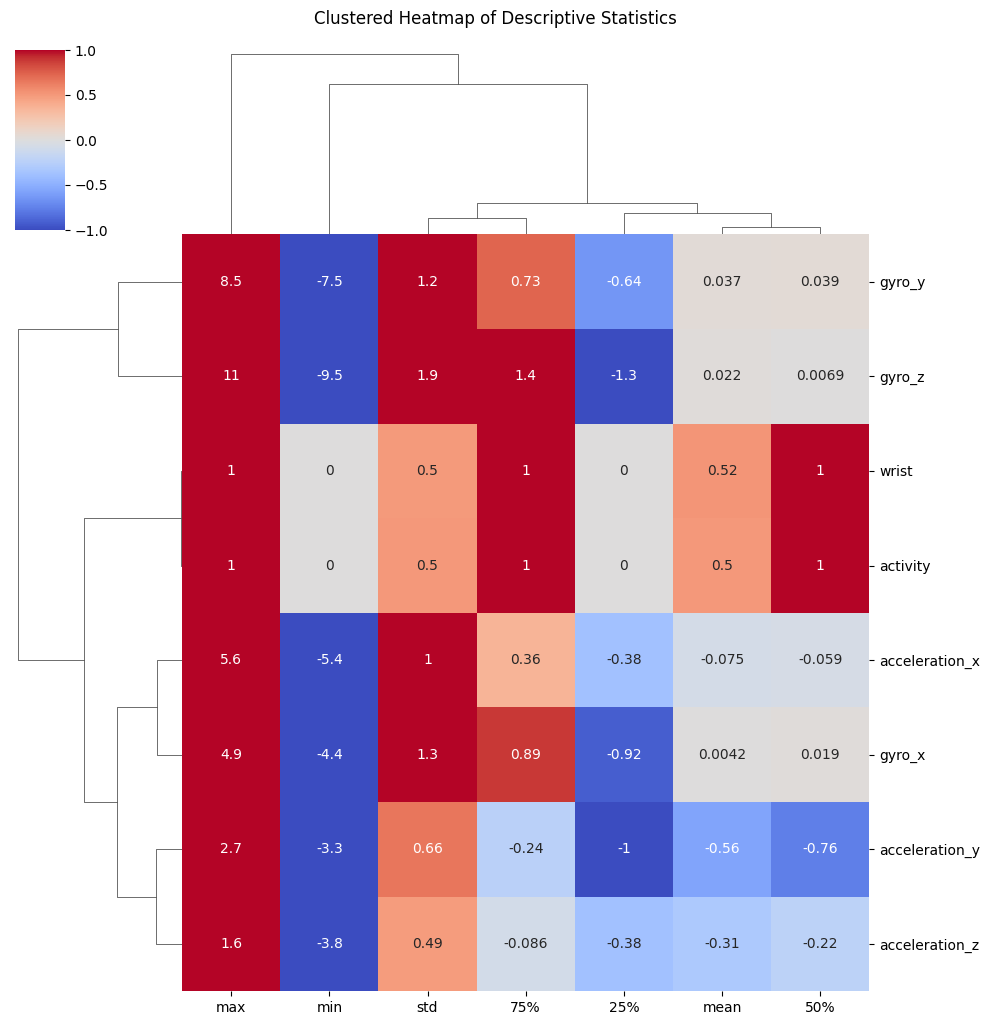

In [12]:
data_description = df.describe().T

# Select specific statistics to include in the heatmap
heatmap_data = data_description[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Create the heatmap with clustering
sns.clustermap(heatmap_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, method='average')
plt.suptitle('Clustered Heatmap of Descriptive Statistics', y=1.02)
plt.show()

In [13]:
df.describe(include='object')

date                time username
count       88588               88588    88588
unique         12               88588        1
top     2017-7-16  13:51:15:847724020   viktor
freq        20480                   1    88588

#### Converting the date column into separate columns


In [14]:
## Date
df['date'] = pd.to_datetime(df['date'])

In [15]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [5]:
df['time']=pd.to_datetime(df["time"],format='%H:%M:%S:%f')

In [16]:
## Time
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S:%f')

In [17]:
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute

In [18]:
df

date                          time username  wrist  activity  \
0     2017-06-30 1900-01-01 13:51:15.847724020   viktor      0         0   
1     2017-06-30 1900-01-01 13:51:16.246945023   viktor      0         0   
2     2017-06-30 1900-01-01 13:51:16.446233987   viktor      0         0   
3     2017-06-30 1900-01-01 13:51:16.646117985   viktor      0         0   
4     2017-06-30 1900-01-01 13:51:16.846738994   viktor      0         0   
...          ...                           ...      ...    ...       ...   
88583 2017-07-09 1900-01-01 20:09:15.317911028   viktor      0         0   
88584 2017-07-09 1900-01-01 20:09:15.517889022   viktor      0         0   
88585 2017-07-09 1900-01-01 20:09:15.717828989   viktor      0         0   
88586 2017-07-09 1900-01-01 20:09:15.917932987   viktor      0         0   
88587 2017-07-09 1900-01-01 20:09:16.117410004   viktor      0         0   

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  \
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296   
1              0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269   
2              0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367   
3              0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336   
4              0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922   
...               ...             ...             ...     ...     ...     ...   
88583          0.3084         -0.8376         -0.1327  0.4823  2.0124  0.6048   
88584          0.4977         -1.0027         -0.4397  0.1022 -1.2565 -0.0761   
88585          0.4587         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616   
88586          0.2590         -0.8582         -0.0759 -1.5165  0.4560 -1.7755   
88587          0.3140         -0.8008         -0.0911  0.1183  1.0850  1.2814   

       year  month  day  hour  minute  
0      2017      6   30    13      51  
1      2017      6   30    13      51  
2      2017      6   30    13      51  
3      2017      6   30    13      51  
4      2017      6   30    13      51  
...     ...    ...  ...   ...     ...  
88583  2017      7    9    20       9  
88584  2017      7    9    20       9  
88585  2017      7    9    20       9  
88586  2017      7    9    20       9  
88587  2017      7    9    20       9  

[88588 rows x 16 columns]

In [19]:
df1=df.copy()

In [20]:
df2 = df.copy()

In [21]:
df2.date = df2['date'].astype(str)
df2.time = df2['time'].astype(str)

# Exploratory Data Analysis(EDA):

In [22]:
data=df.copy()

## Insights:
- We extract the Month and Day from the Date column and stored it in separate columns as 'Month' and 'Day'.
- We extract the Hour and Minute from the Time column and stored it in separate columns as 'Hour' and 'Minute'.
- We created a copy of the dataframe to use it as the predictor variable for 'LSTM' model. This model requires Sequential Data.
- We converted the date and time columns into string datatype and used it Descriptive Statistical Analysis.

#### Removing the username column

In [23]:
df.username.unique()

array(['viktor'], dtype=object)

In [24]:
df.drop(('username'),axis=1,inplace=True)

In [25]:
df

date                          time  wrist  activity  \
0     2017-06-30 1900-01-01 13:51:15.847724020      0         0   
1     2017-06-30 1900-01-01 13:51:16.246945023      0         0   
2     2017-06-30 1900-01-01 13:51:16.446233987      0         0   
3     2017-06-30 1900-01-01 13:51:16.646117985      0         0   
4     2017-06-30 1900-01-01 13:51:16.846738994      0         0   
...          ...                           ...    ...       ...   
88583 2017-07-09 1900-01-01 20:09:15.317911028      0         0   
88584 2017-07-09 1900-01-01 20:09:15.517889022      0         0   
88585 2017-07-09 1900-01-01 20:09:15.717828989      0         0   
88586 2017-07-09 1900-01-01 20:09:15.917932987      0         0   
88587 2017-07-09 1900-01-01 20:09:16.117410004      0         0   

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  \
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296   
1              0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269   
2              0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367   
3              0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336   
4              0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922   
...               ...             ...             ...     ...     ...     ...   
88583          0.3084         -0.8376         -0.1327  0.4823  2.0124  0.6048   
88584          0.4977         -1.0027         -0.4397  0.1022 -1.2565 -0.0761   
88585          0.4587         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616   
88586          0.2590         -0.8582         -0.0759 -1.5165  0.4560 -1.7755   
88587          0.3140         -0.8008         -0.0911  0.1183  1.0850  1.2814   

       year  month  day  hour  minute  
0      2017      6   30    13      51  
1      2017      6   30    13      51  
2      2017      6   30    13      51  
3      2017      6   30    13      51  
4      2017      6   30    13      51  
...     ...    ...  ...   ...     ...  
88583  2017      7    9    20       9  
88584  2017      7    9    20       9  
88585  2017      7    9    20       9  
88586  2017      7    9    20       9  
88587  2017      7    9    20       9  

[88588 rows x 15 columns]

In [26]:
df.activity.unique()

array([0, 1], dtype=int64)

In [27]:
df.activity.value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

### Insights:

- From the Activity column ,we can conclude that the given dataset is a **Balanced** Dataset.

                                             |                                             | [  0%]   00:00 ->…


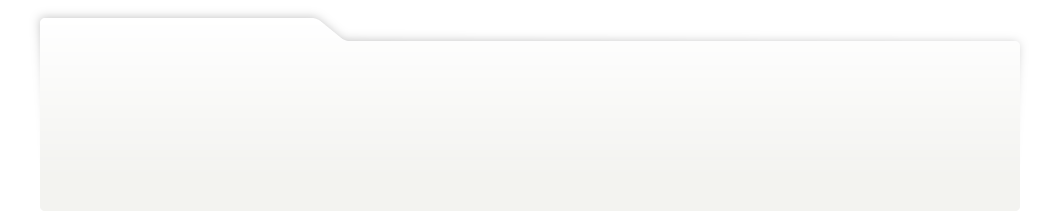
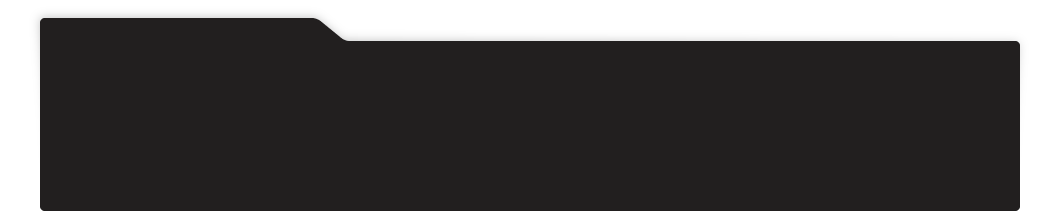
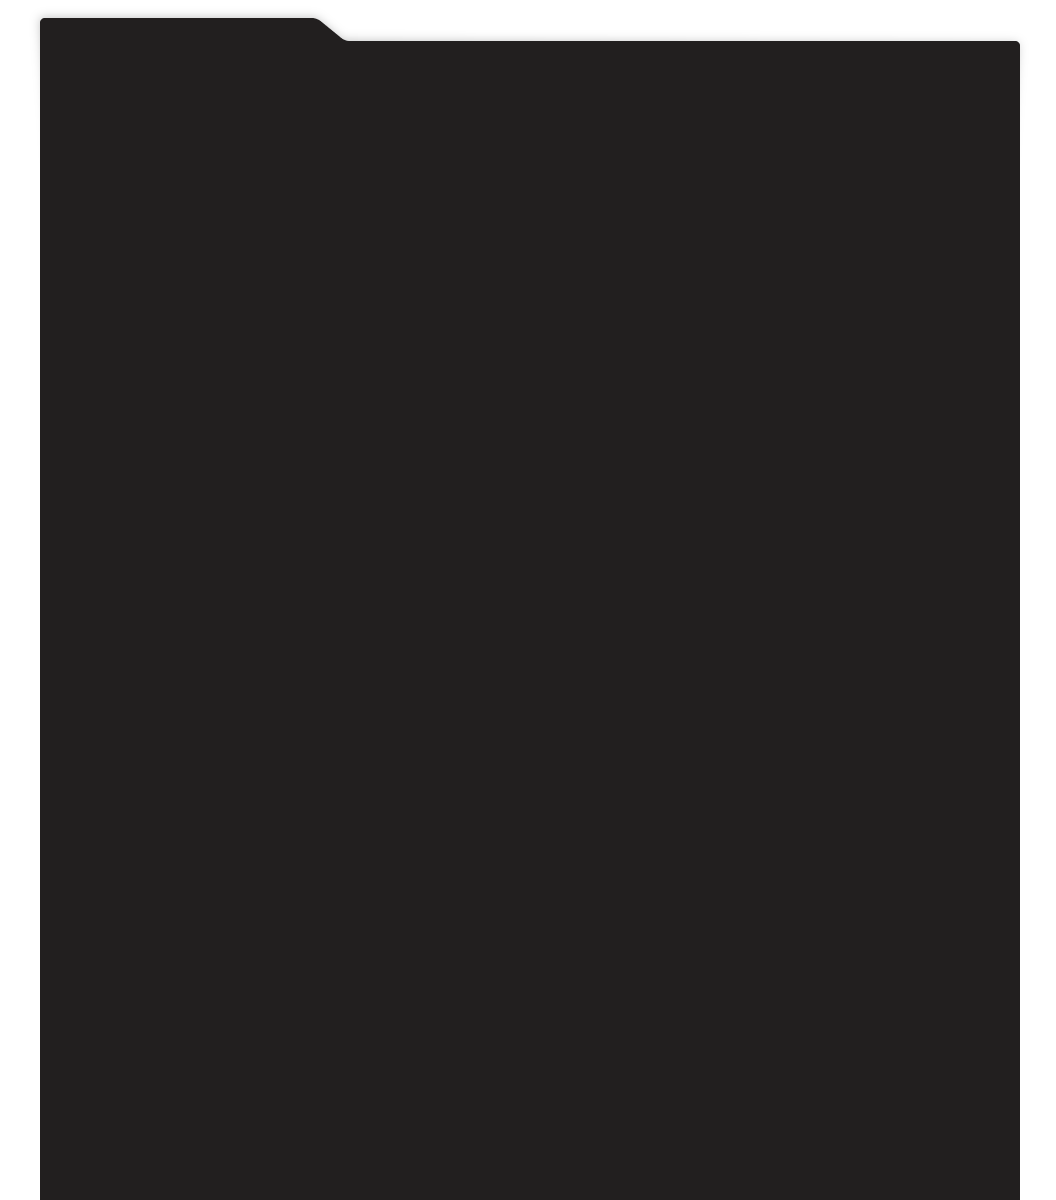
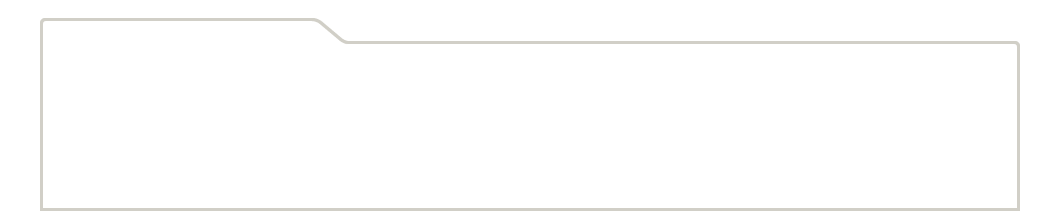
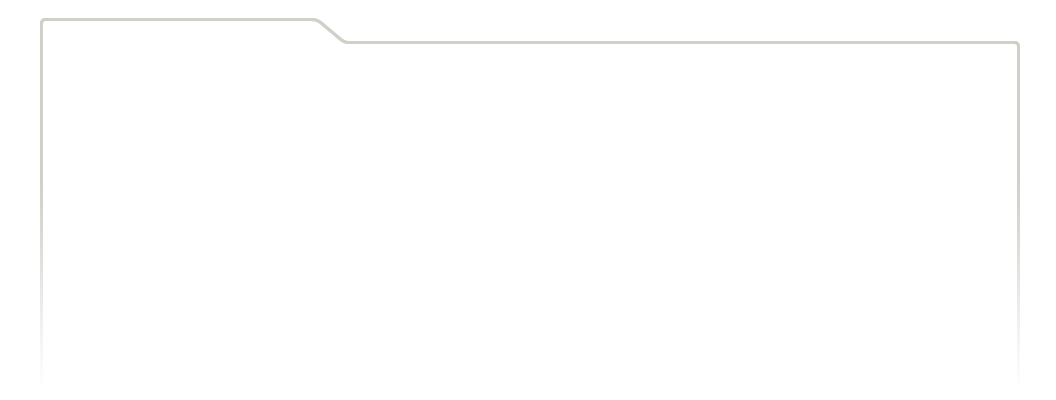
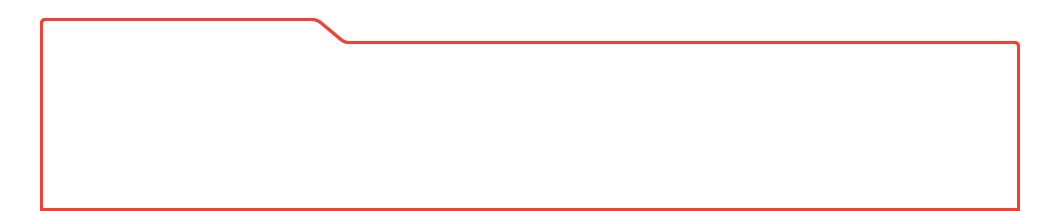
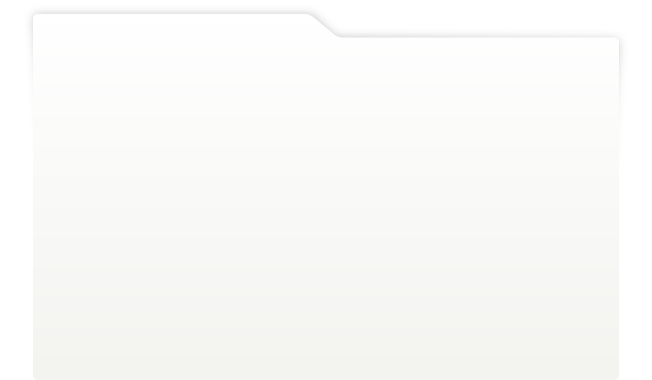
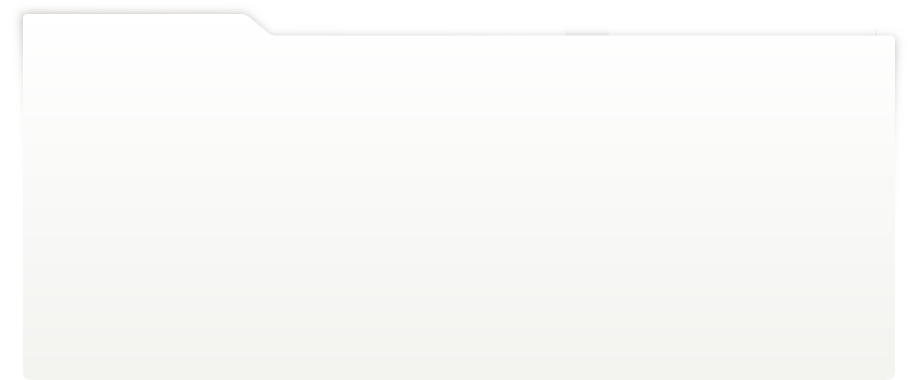
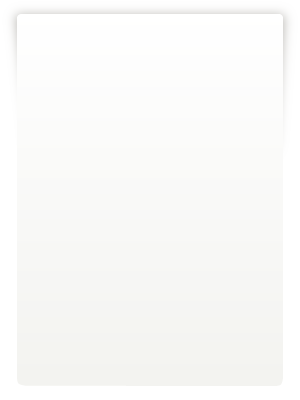
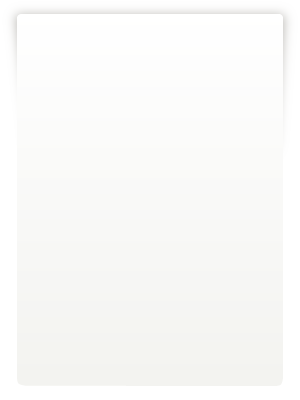
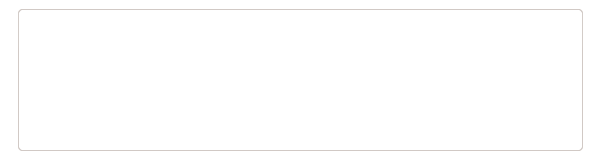
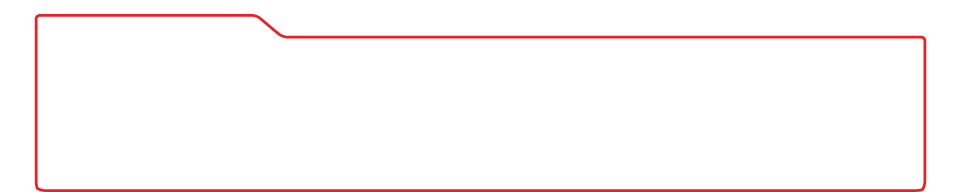
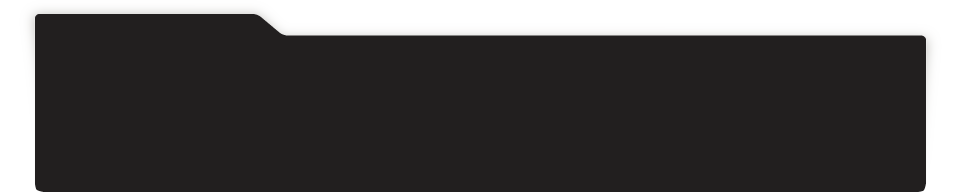
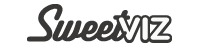
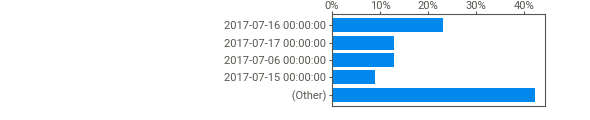
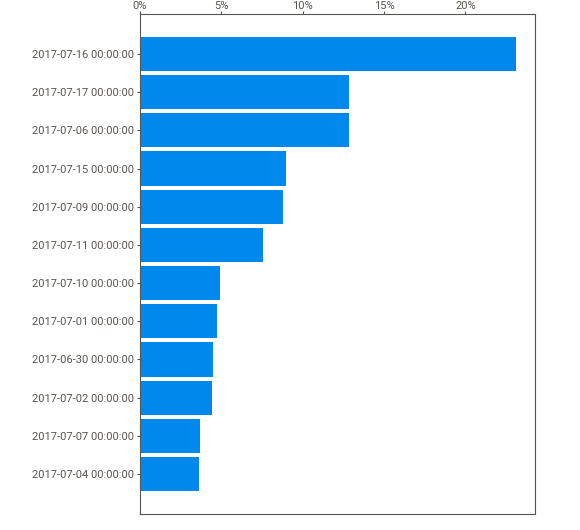
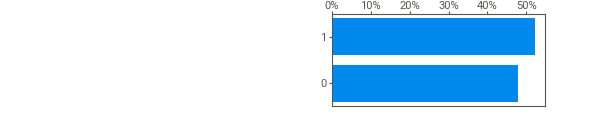
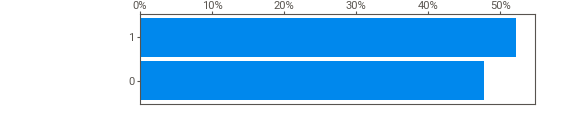
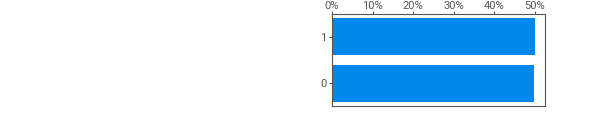
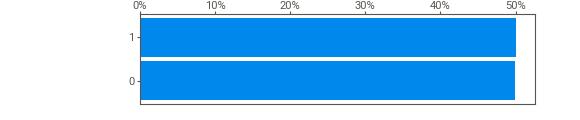
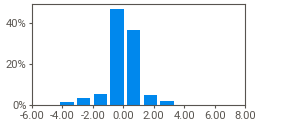
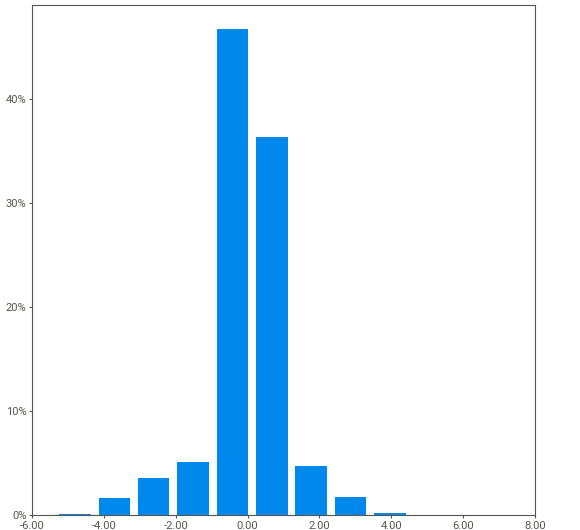
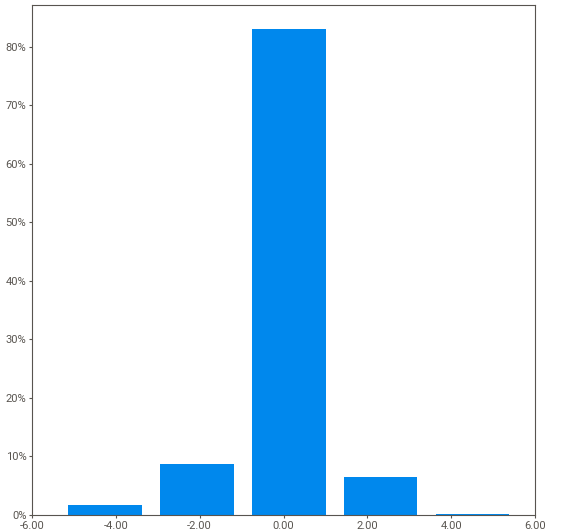
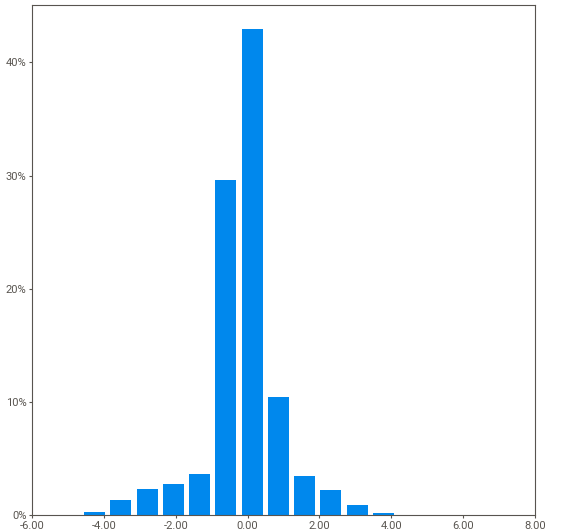
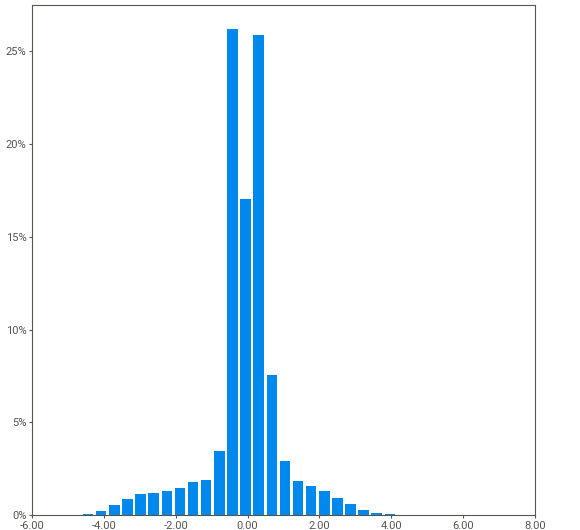
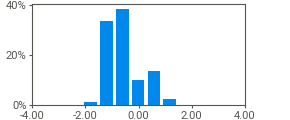
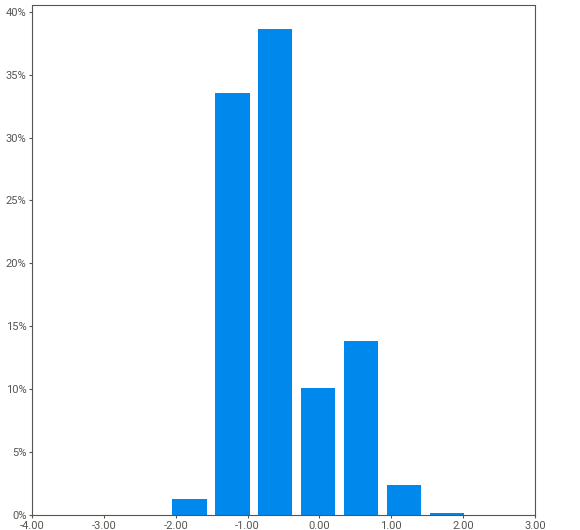
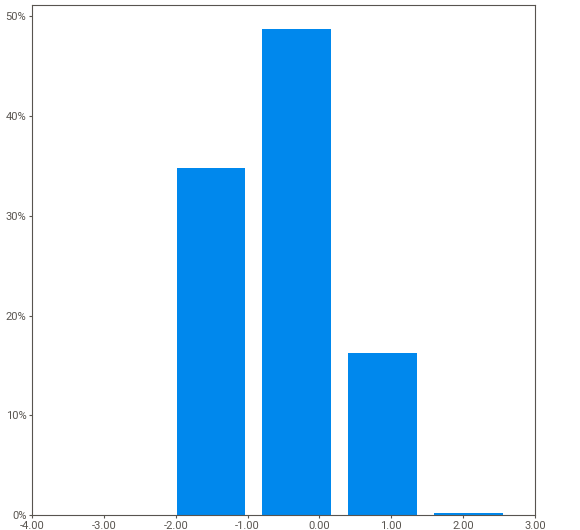
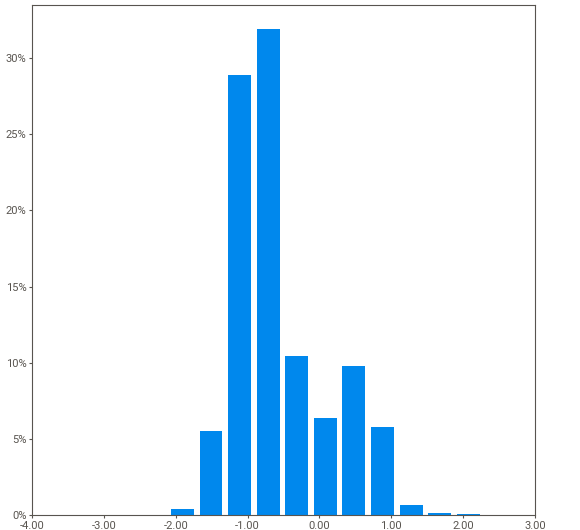
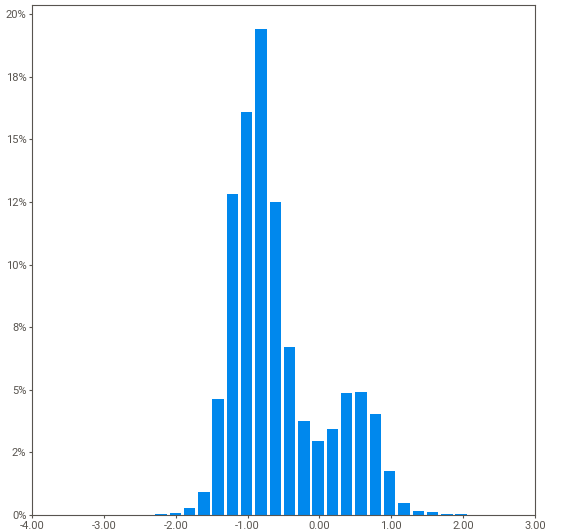
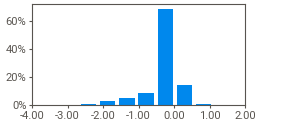
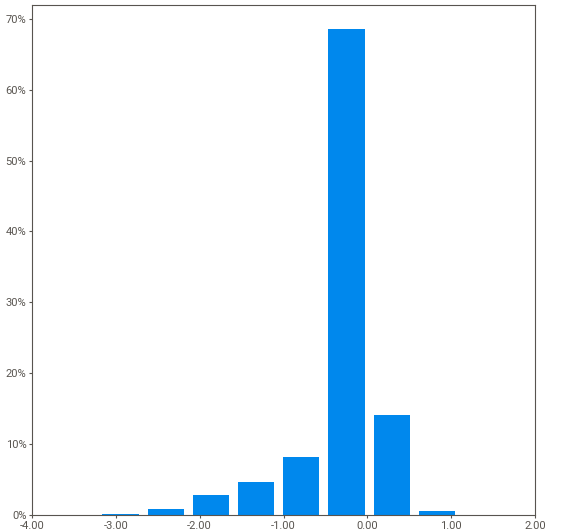
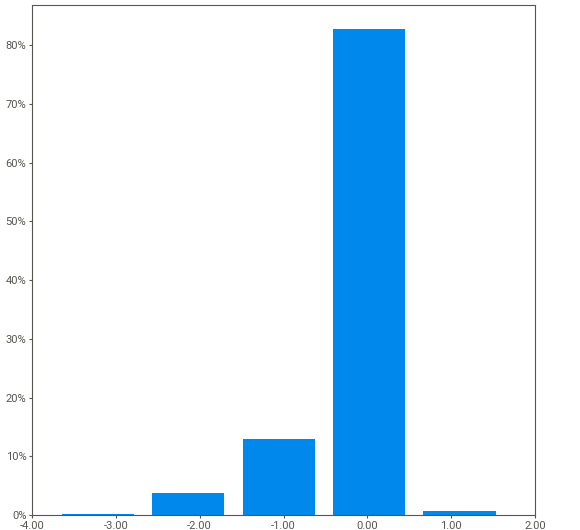
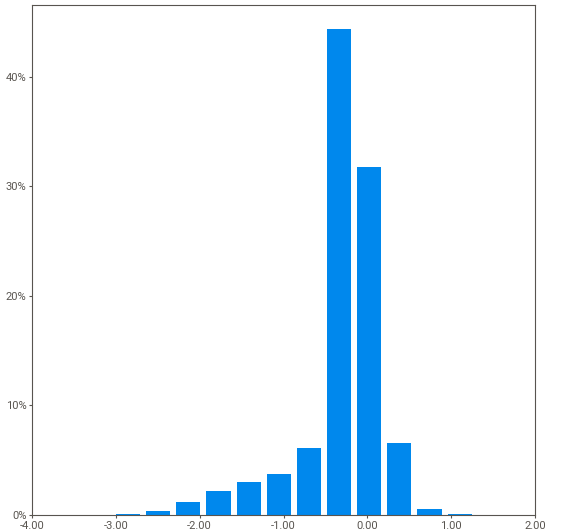
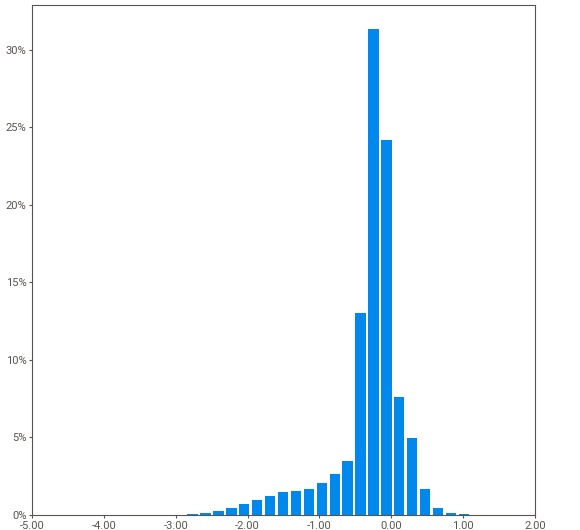
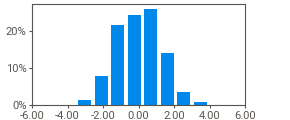
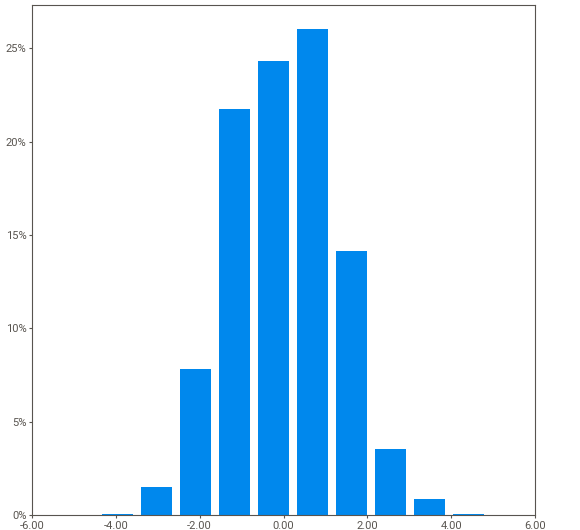
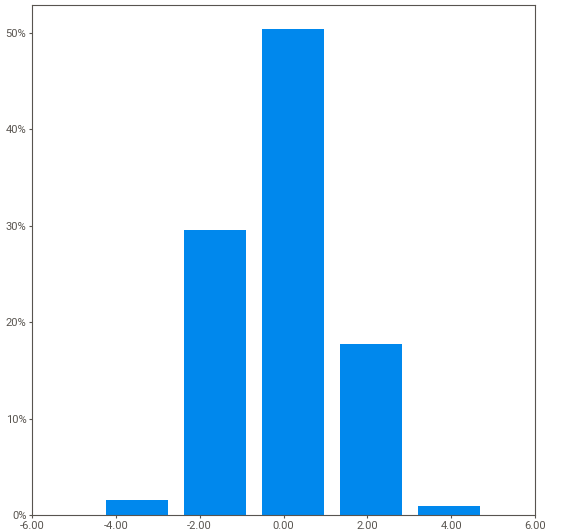
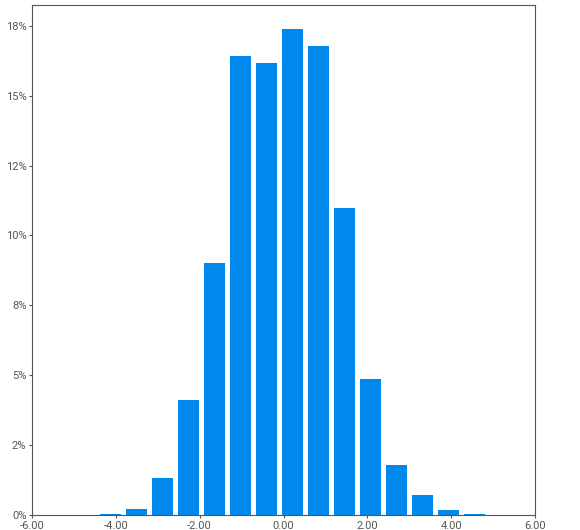
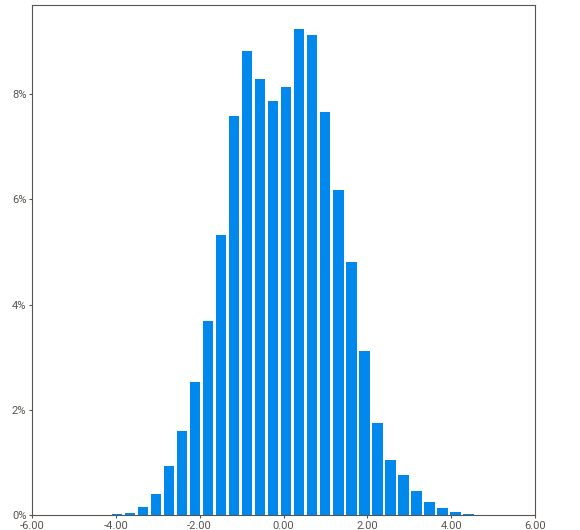
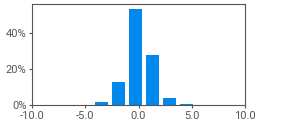
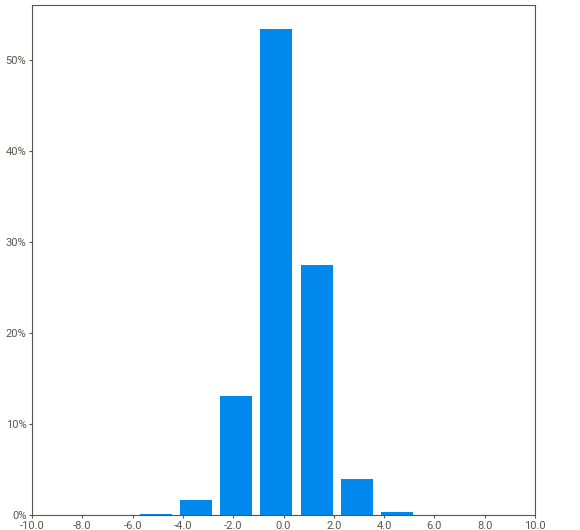
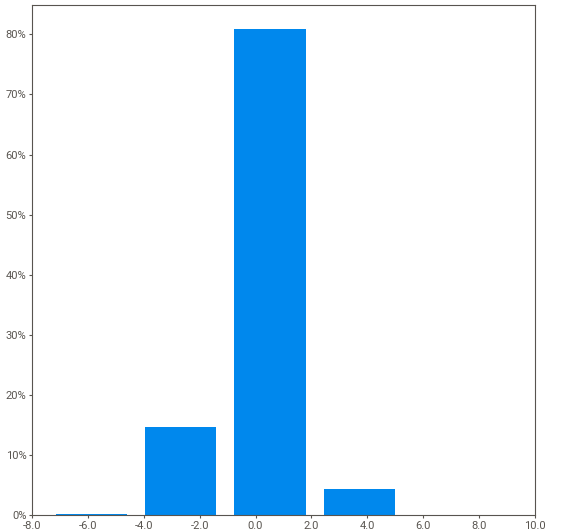
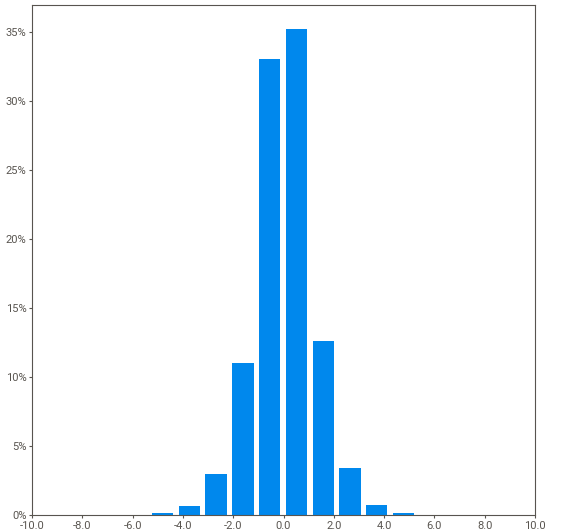
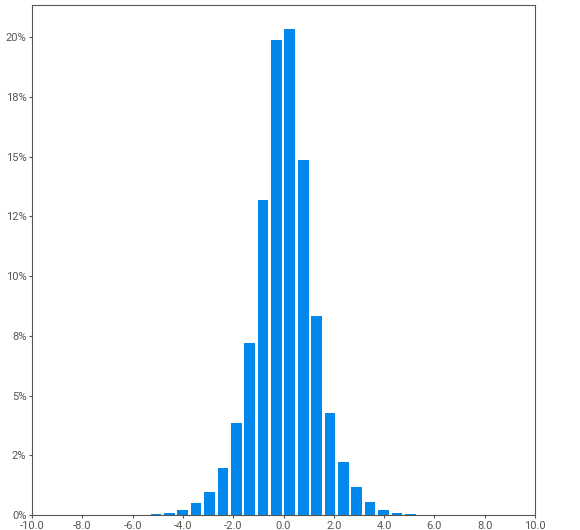
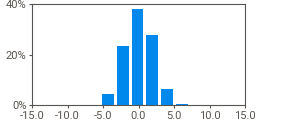
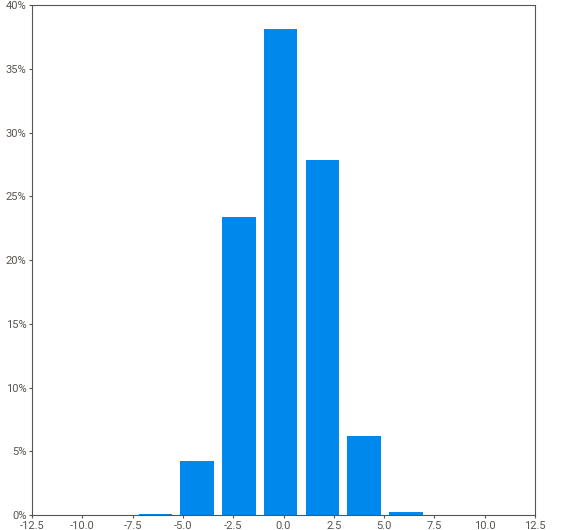
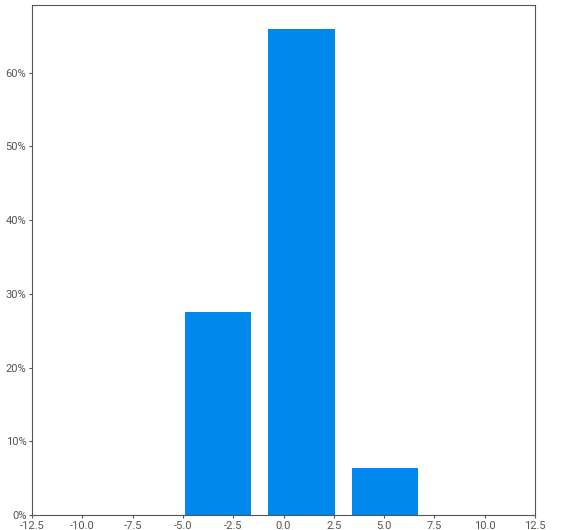
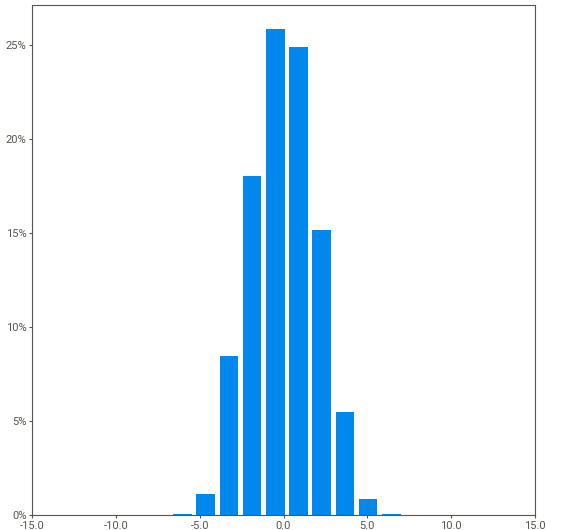
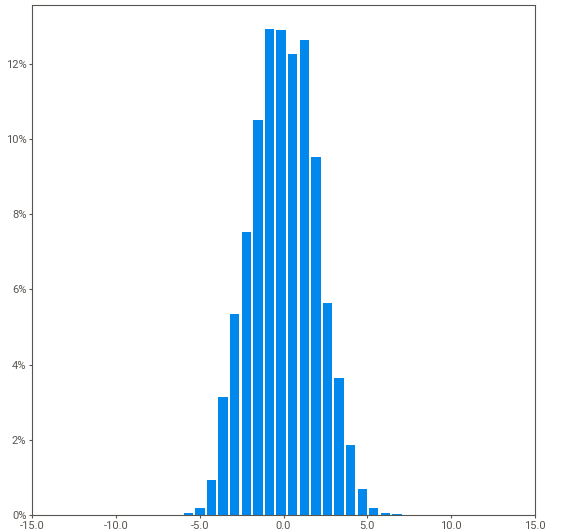
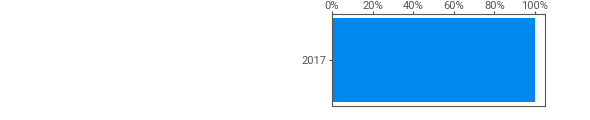
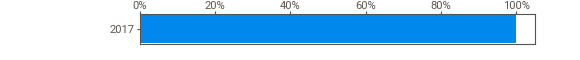
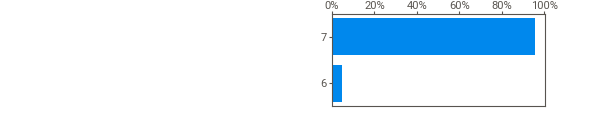
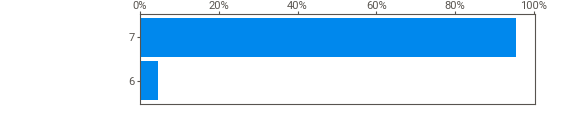
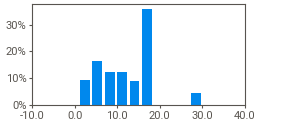
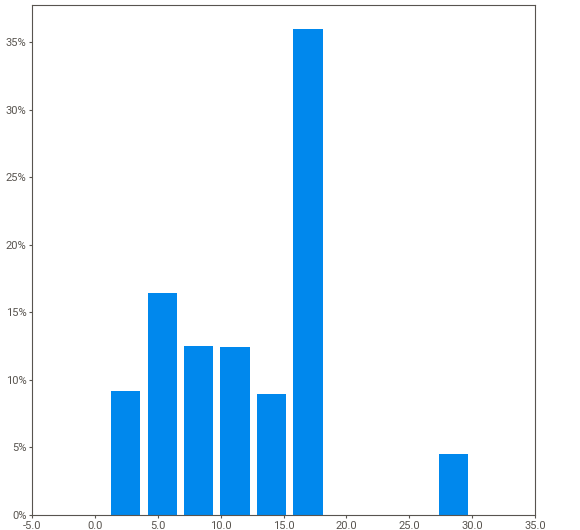
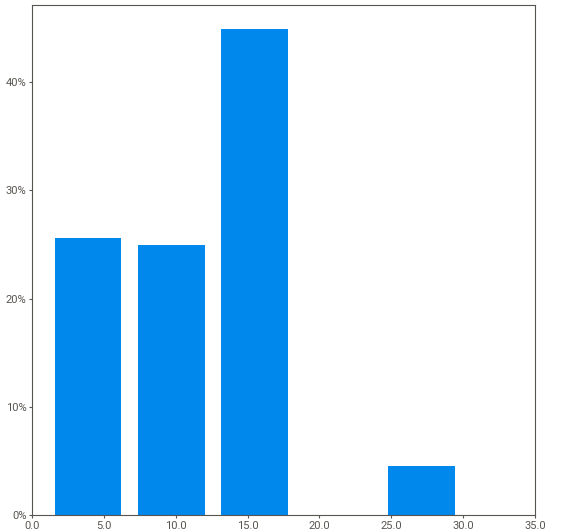
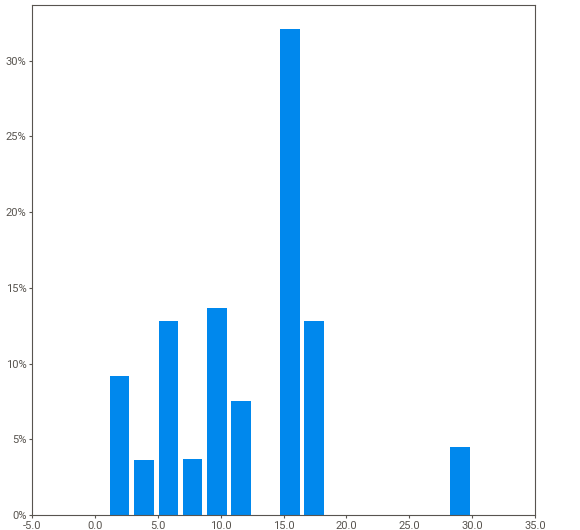
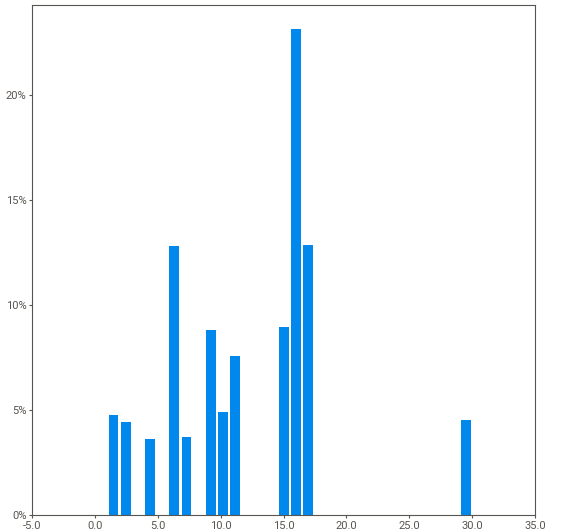
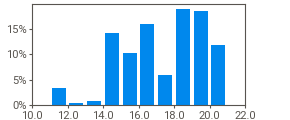
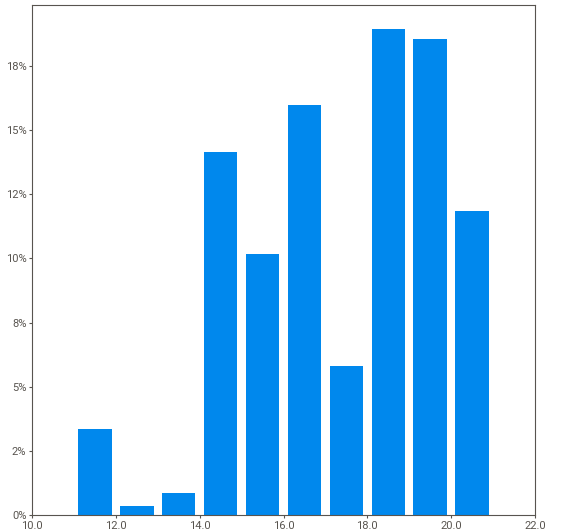
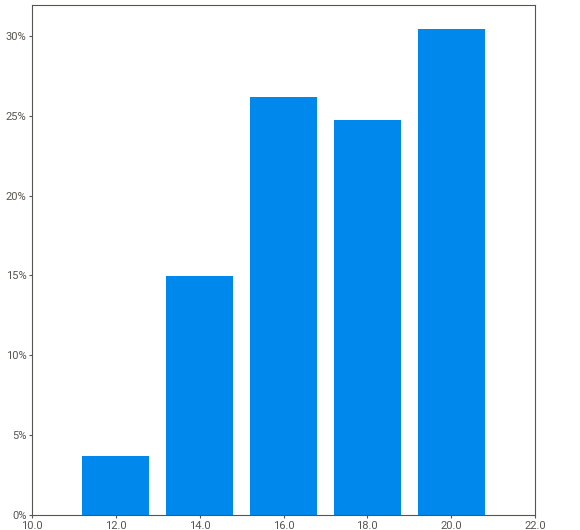
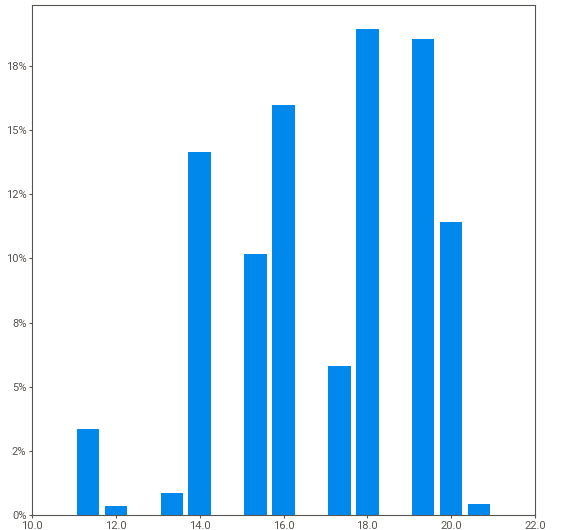
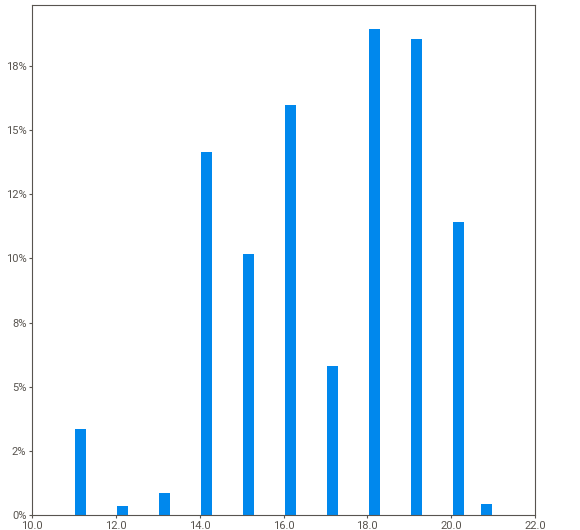
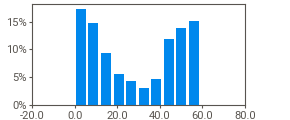
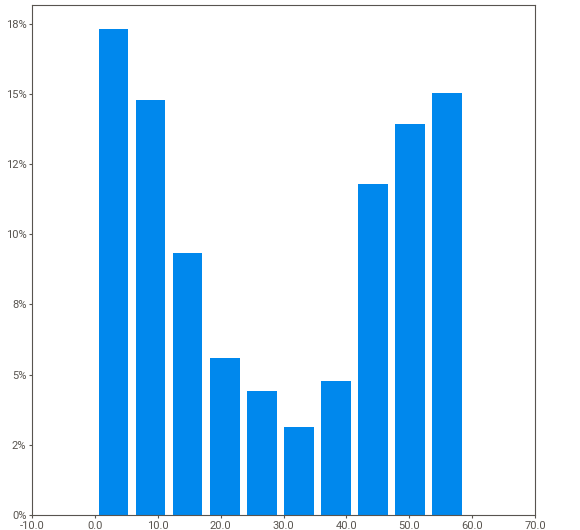
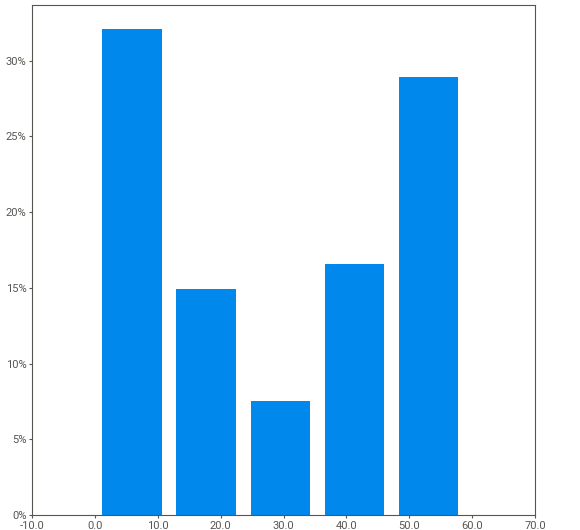
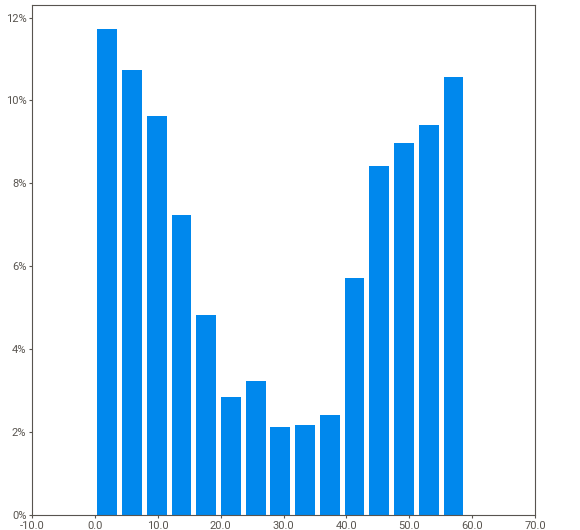
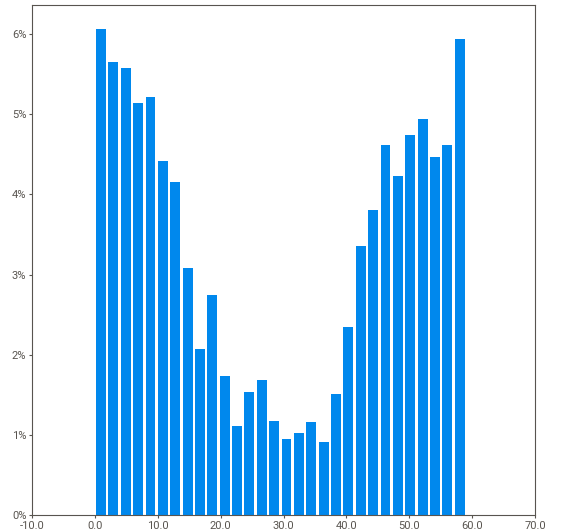
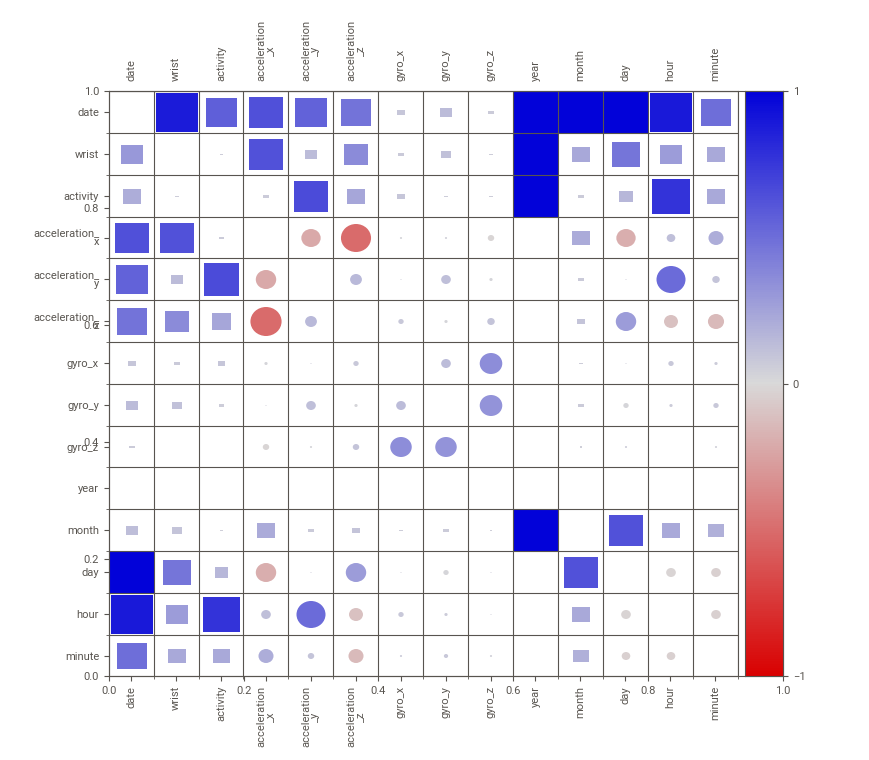
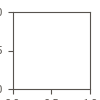

In [28]:
## Sweetviz report

import sweetviz as sv


reports = sv.analyze(df)
reports.show_notebook()


## Univariate Analysis

In [29]:
df

date                          time  wrist  activity  \
0     2017-06-30 1900-01-01 13:51:15.847724020      0         0   
1     2017-06-30 1900-01-01 13:51:16.246945023      0         0   
2     2017-06-30 1900-01-01 13:51:16.446233987      0         0   
3     2017-06-30 1900-01-01 13:51:16.646117985      0         0   
4     2017-06-30 1900-01-01 13:51:16.846738994      0         0   
...          ...                           ...    ...       ...   
88583 2017-07-09 1900-01-01 20:09:15.317911028      0         0   
88584 2017-07-09 1900-01-01 20:09:15.517889022      0         0   
88585 2017-07-09 1900-01-01 20:09:15.717828989      0         0   
88586 2017-07-09 1900-01-01 20:09:15.917932987      0         0   
88587 2017-07-09 1900-01-01 20:09:16.117410004      0         0   

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  \
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296   
1              0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269   
2              0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367   
3              0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336   
4              0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922   
...               ...             ...             ...     ...     ...     ...   
88583          0.3084         -0.8376         -0.1327  0.4823  2.0124  0.6048   
88584          0.4977         -1.0027         -0.4397  0.1022 -1.2565 -0.0761   
88585          0.4587         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616   
88586          0.2590         -0.8582         -0.0759 -1.5165  0.4560 -1.7755   
88587          0.3140         -0.8008         -0.0911  0.1183  1.0850  1.2814   

       year  month  day  hour  minute  
0      2017      6   30    13      51  
1      2017      6   30    13      51  
2      2017      6   30    13      51  
3      2017      6   30    13      51  
4      2017      6   30    13      51  
...     ...    ...  ...   ...     ...  
88583  2017      7    9    20       9  
88584  2017      7    9    20       9  
88585  2017      7    9    20       9  
88586  2017      7    9    20       9  
88587  2017      7    9    20       9  

[88588 rows x 15 columns]

### Splitting the above columns into continous and discrete columns

In [30]:
## Continous Column
df_con = df[['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z','day','minute']]
df_con

acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  \
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296   
1              0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269   
2              0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367   
3              0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336   
4              0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922   
...               ...             ...             ...     ...     ...     ...   
88583          0.3084         -0.8376         -0.1327  0.4823  2.0124  0.6048   
88584          0.4977         -1.0027         -0.4397  0.1022 -1.2565 -0.0761   
88585          0.4587         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616   
88586          0.2590         -0.8582         -0.0759 -1.5165  0.4560 -1.7755   
88587          0.3140         -0.8008         -0.0911  0.1183  1.0850  1.2814   

       day  minute  
0       30      51  
1       30      51  
2       30      51  
3       30      51  
4       30      51  
...    ...     ...  
88583    9       9  
88584    9       9  
88585    9       9  
88586    9       9  
88587    9       9  

[88588 rows x 8 columns]

In [31]:
## Discrete Columns

df_dis = df[['date','wrist','activity','month','day','hour']]
df_dis["activity"].replace(to_replace={0: "walk", 1: "un"}, inplace=True)
df_dis

date  wrist activity  month  day  hour
0     2017-06-30      0     walk      6   30    13
1     2017-06-30      0     walk      6   30    13
2     2017-06-30      0     walk      6   30    13
3     2017-06-30      0     walk      6   30    13
4     2017-06-30      0     walk      6   30    13
...          ...    ...      ...    ...  ...   ...
88583 2017-07-09      0     walk      7    9    20
88584 2017-07-09      0     walk      7    9    20
88585 2017-07-09      0     walk      7    9    20
88586 2017-07-09      0     walk      7    9    20
88587 2017-07-09      0     walk      7    9    20

[88588 rows x 6 columns]

#### Continous Column Analysis

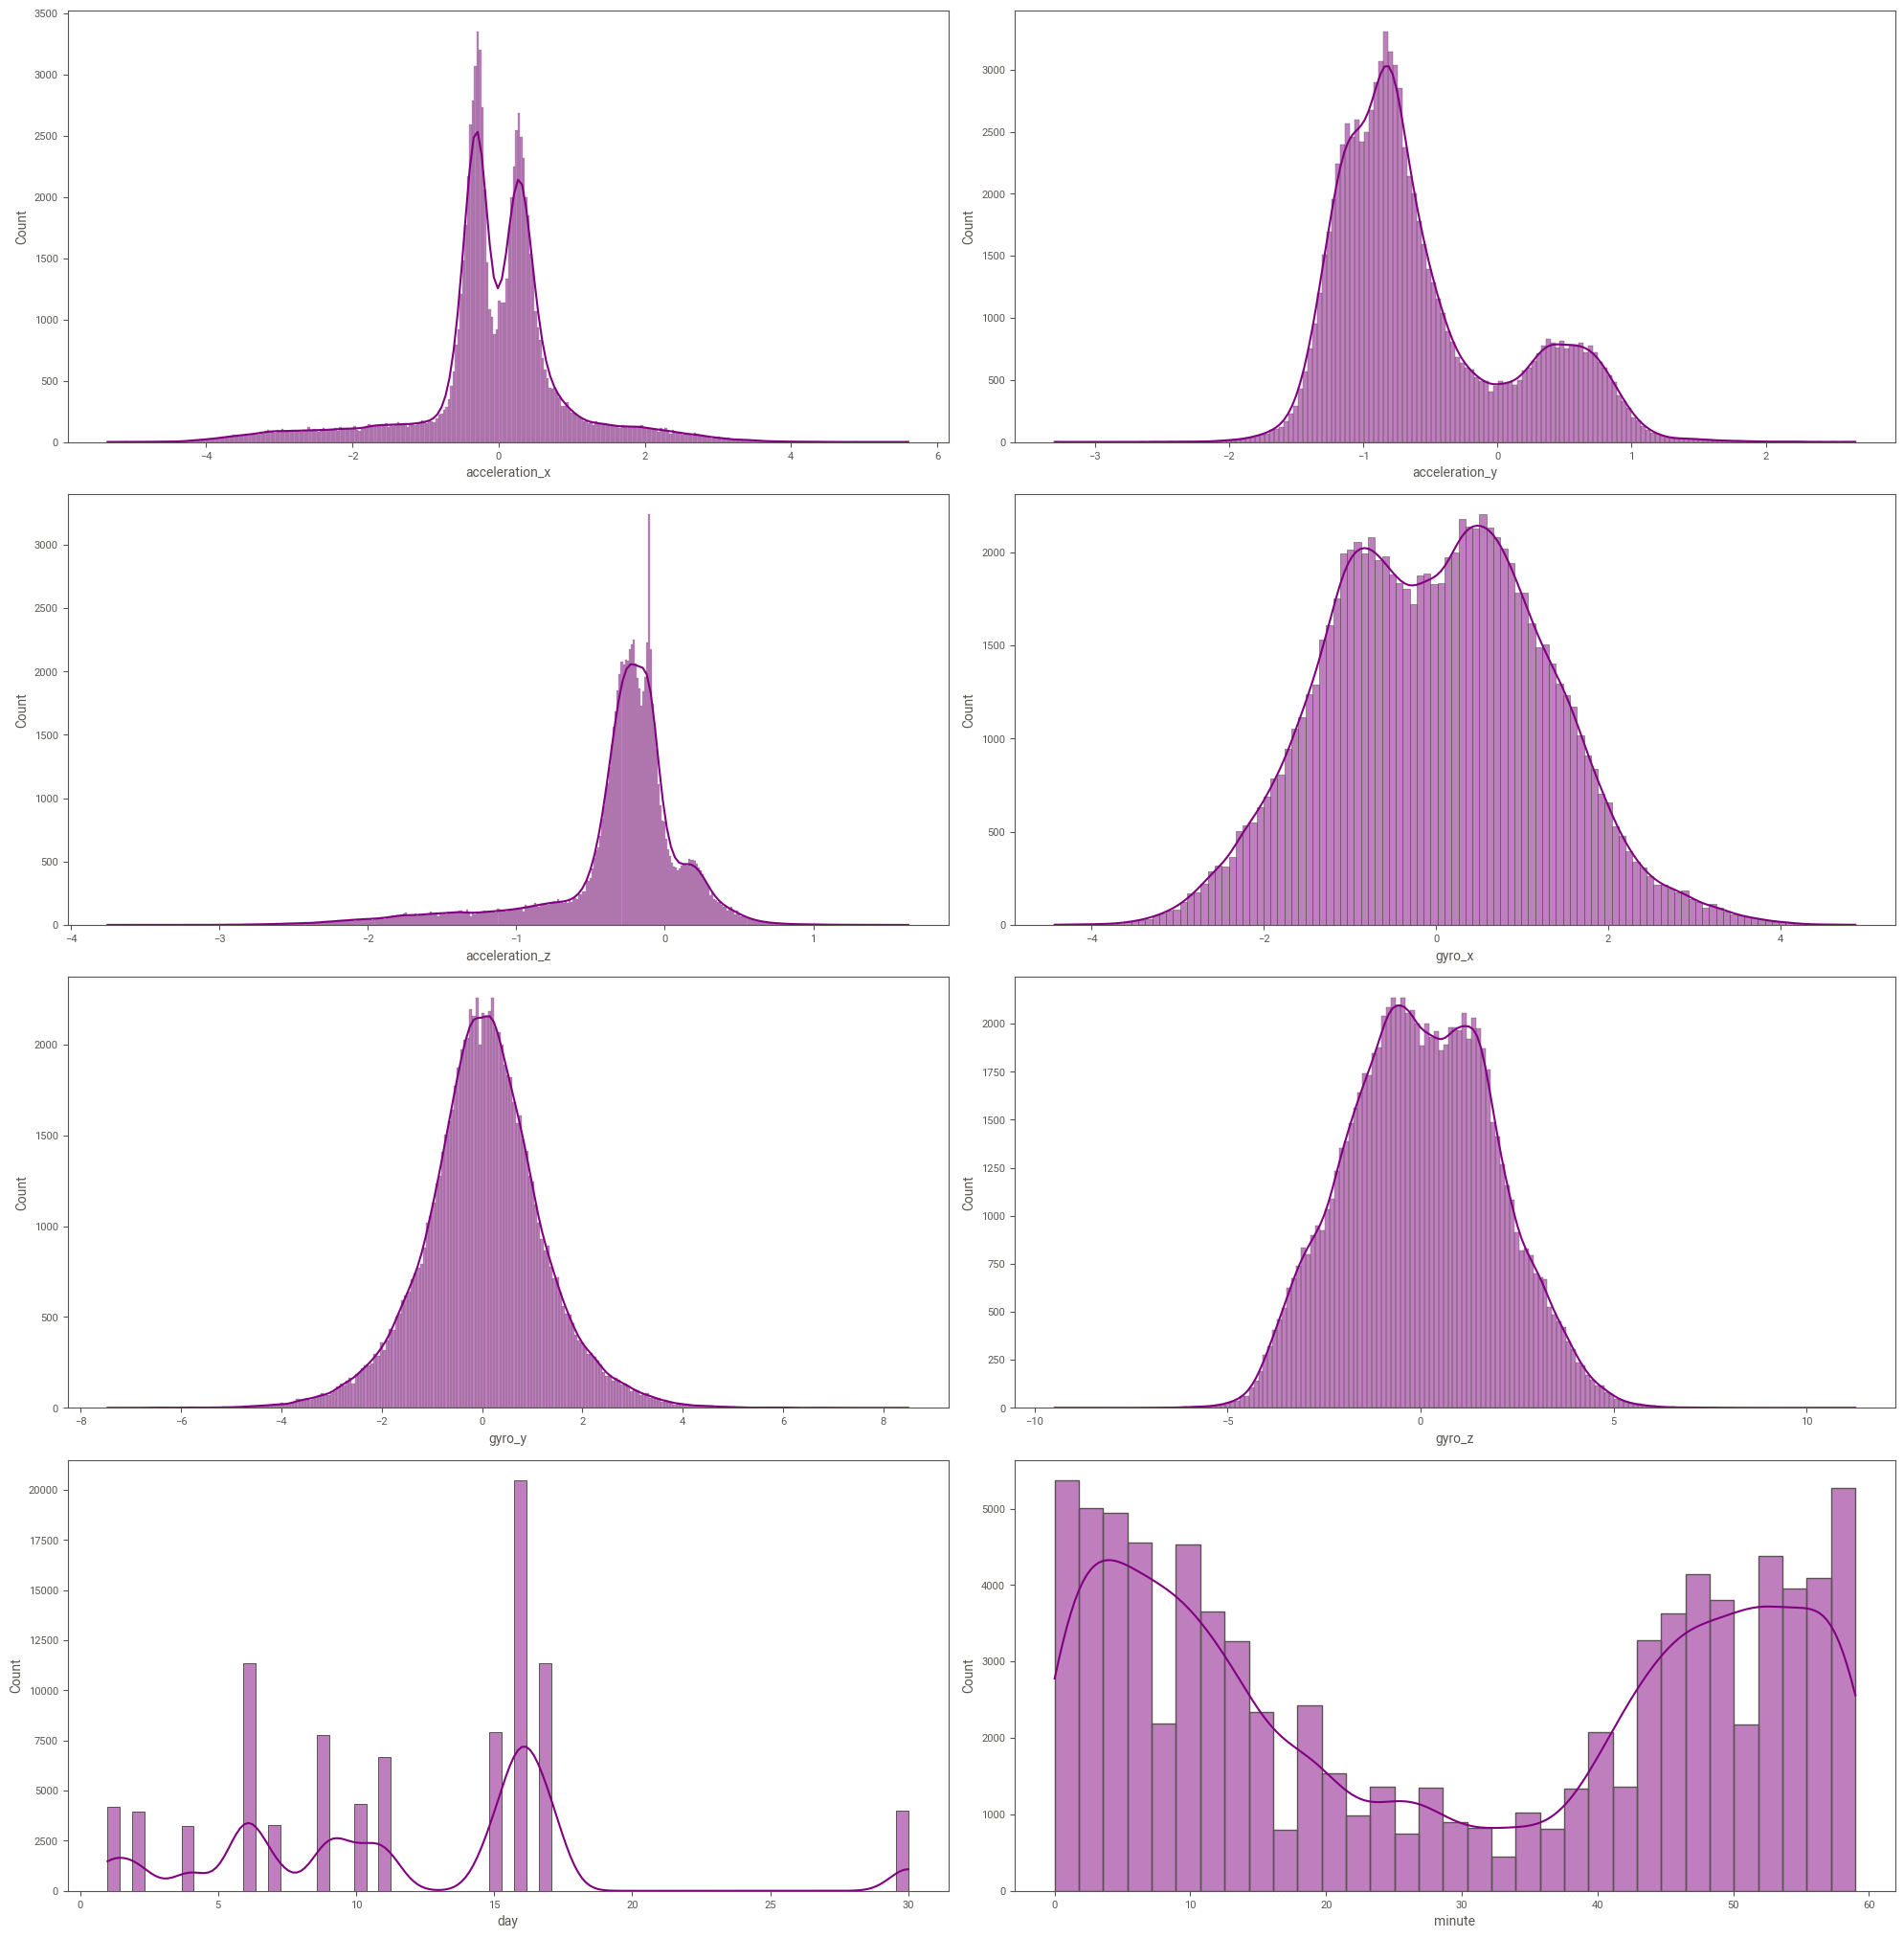

In [32]:
plt.figure(figsize=(20,25))
plotnum = 1

for column in df_con:
    if plotnum<=9:
        plt.subplot(5,2,plotnum)
        sns.histplot(x=df_con[column],kde=True,color='purple',legend=True)
        plotnum+=1
        
plt.tight_layout()        
    

#### Discrete Column Analysis

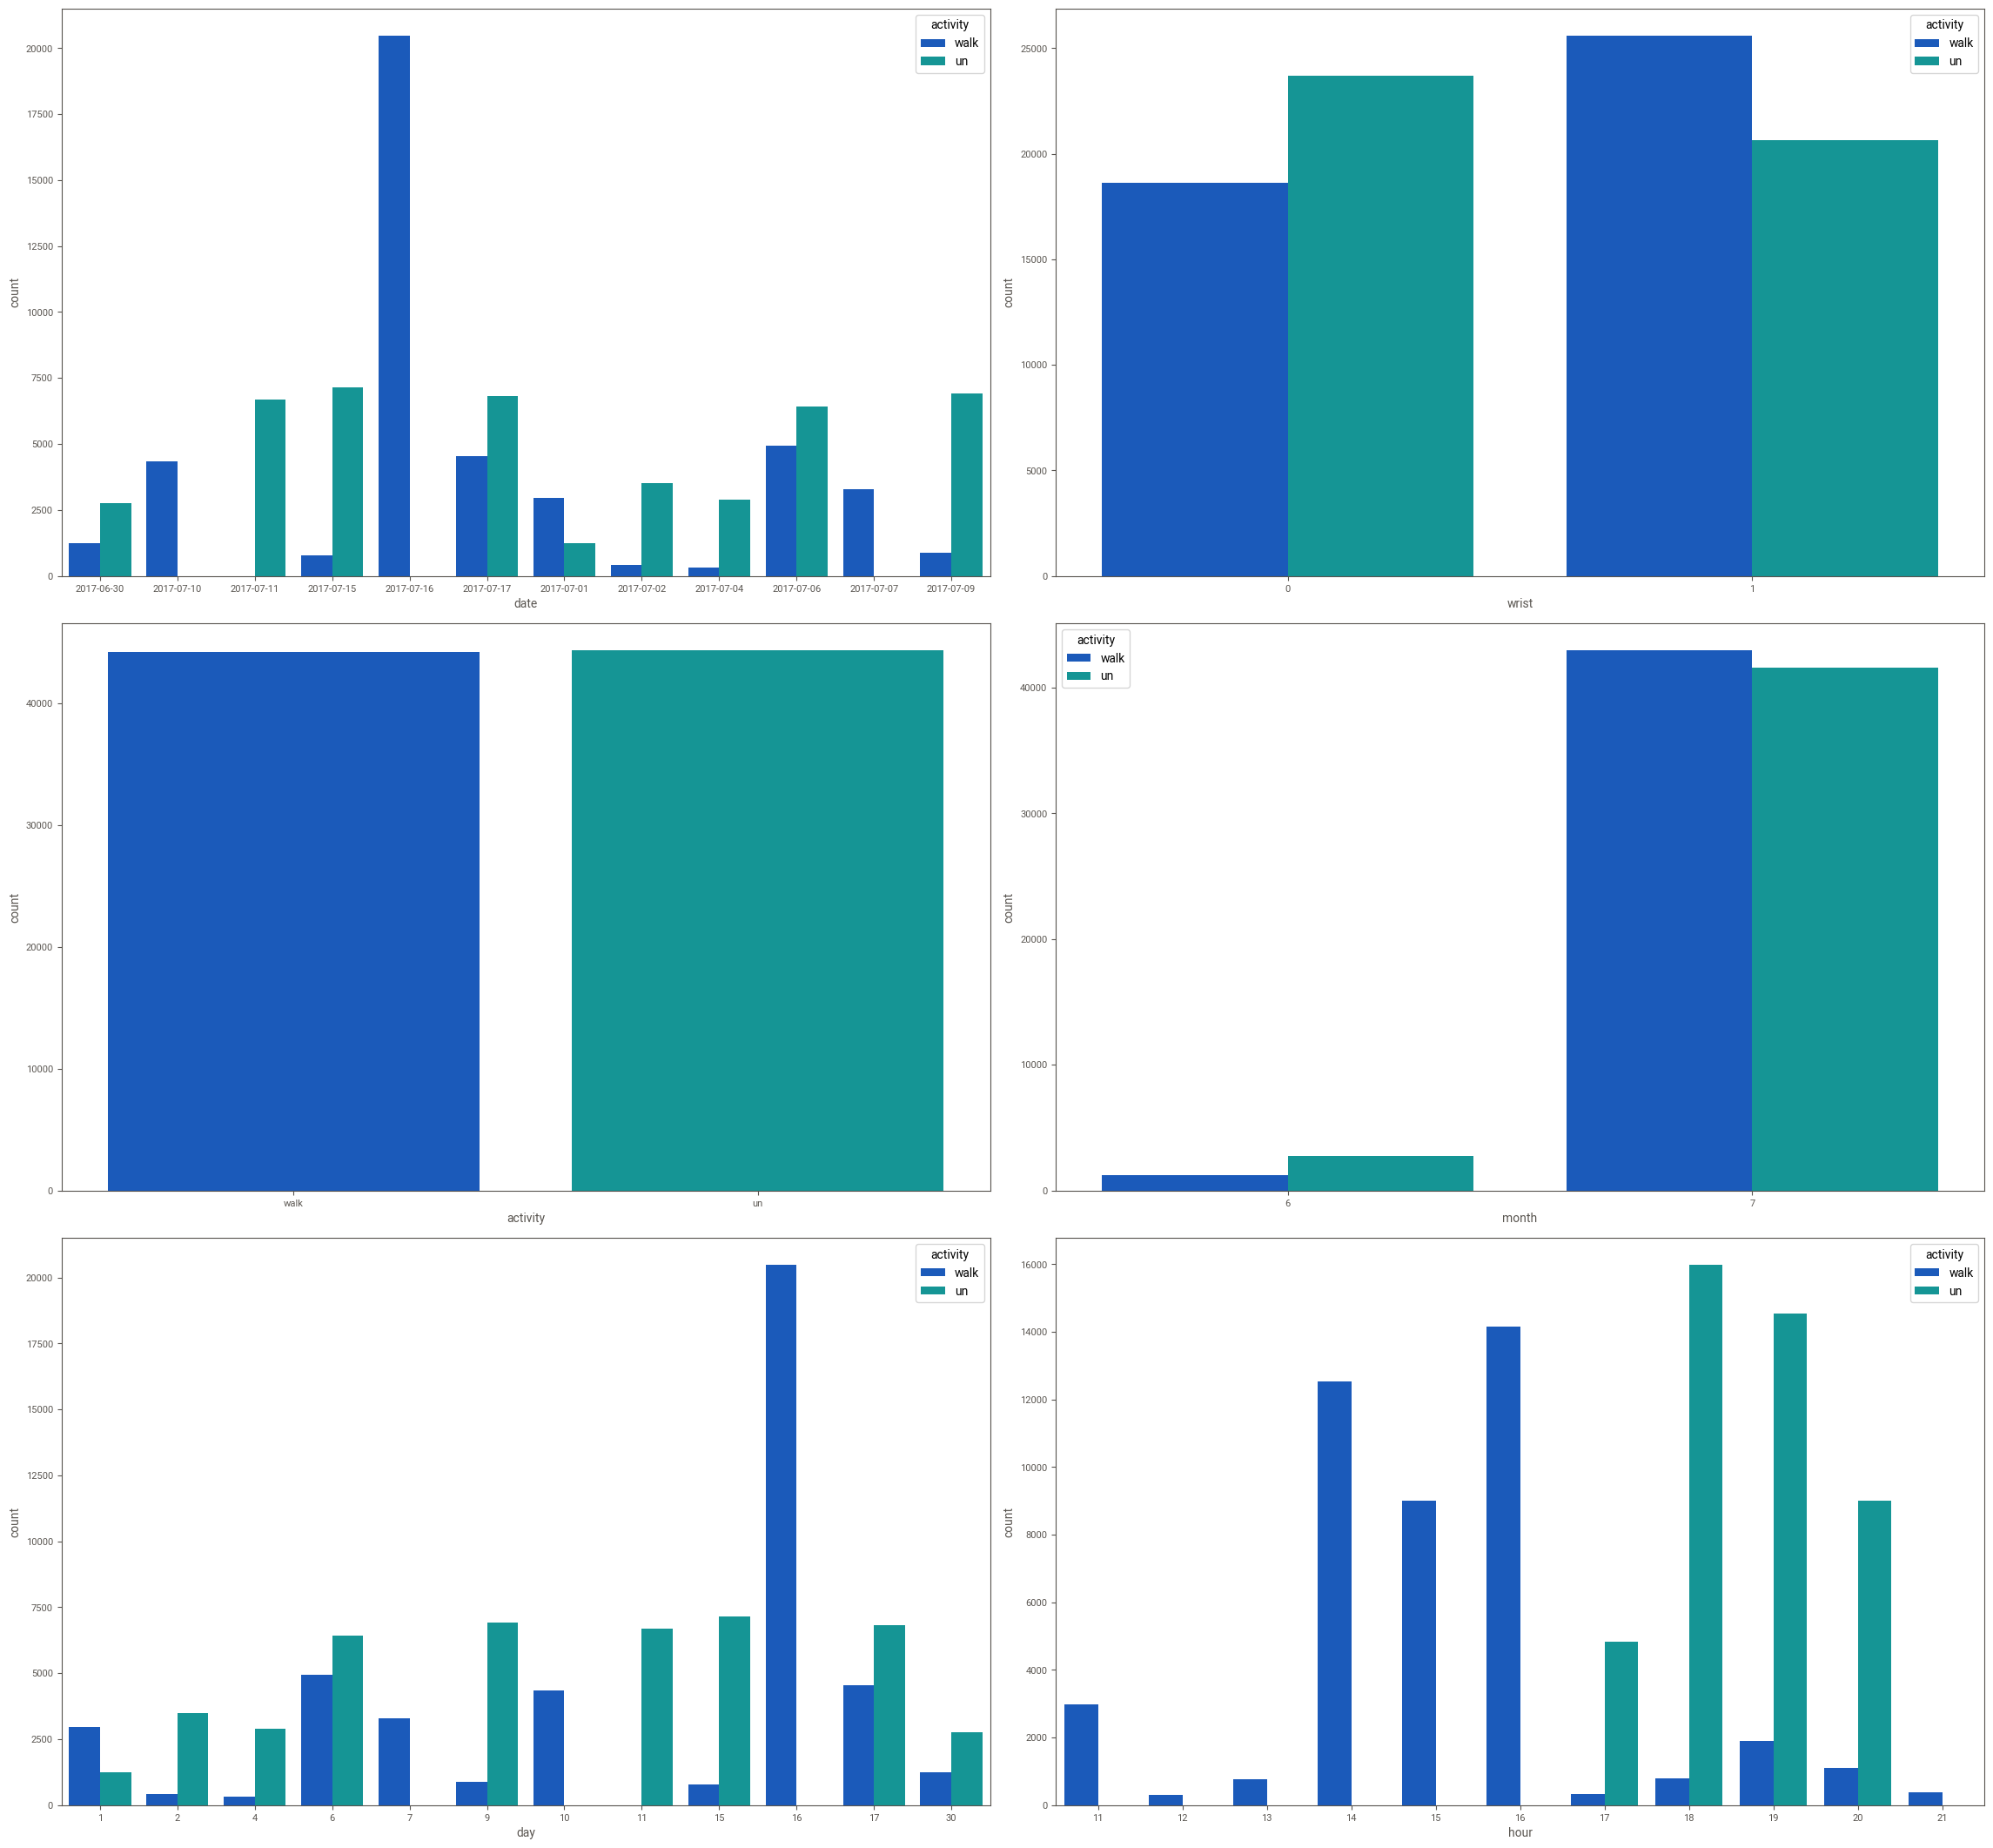

In [33]:
plt.figure(figsize=(23,28),facecolor='white')
plotnumber = 1

for column in df_dis:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.countplot(data = df,x=df_dis[column],hue=df_dis["activity"],palette='winter')
    plotnumber+=1
    
plt.tight_layout()    

## Insights:
- We have separated the continous and discrete columns from the dataset.
- From the analysis columns acceleration-x has kurtosis.
- For x-axis, accelerometer data is roughly symmetric and the double peak pattern is because of two "wrist"       values
- The coulmn accelerationZ has skewness
- Analysis indicates that the left wrist data shows a higher count for walking activities compared to the right   wrist.
- Right wrist data shows a higher count for run activities.
- The data utilized in this analysis was collected exclusively from the year 2017.
- The data was collected exclusively from the month June(6) and July(7).
- The user has recorded more acitivites in the month of July than June.


## Bi-variate Analysis

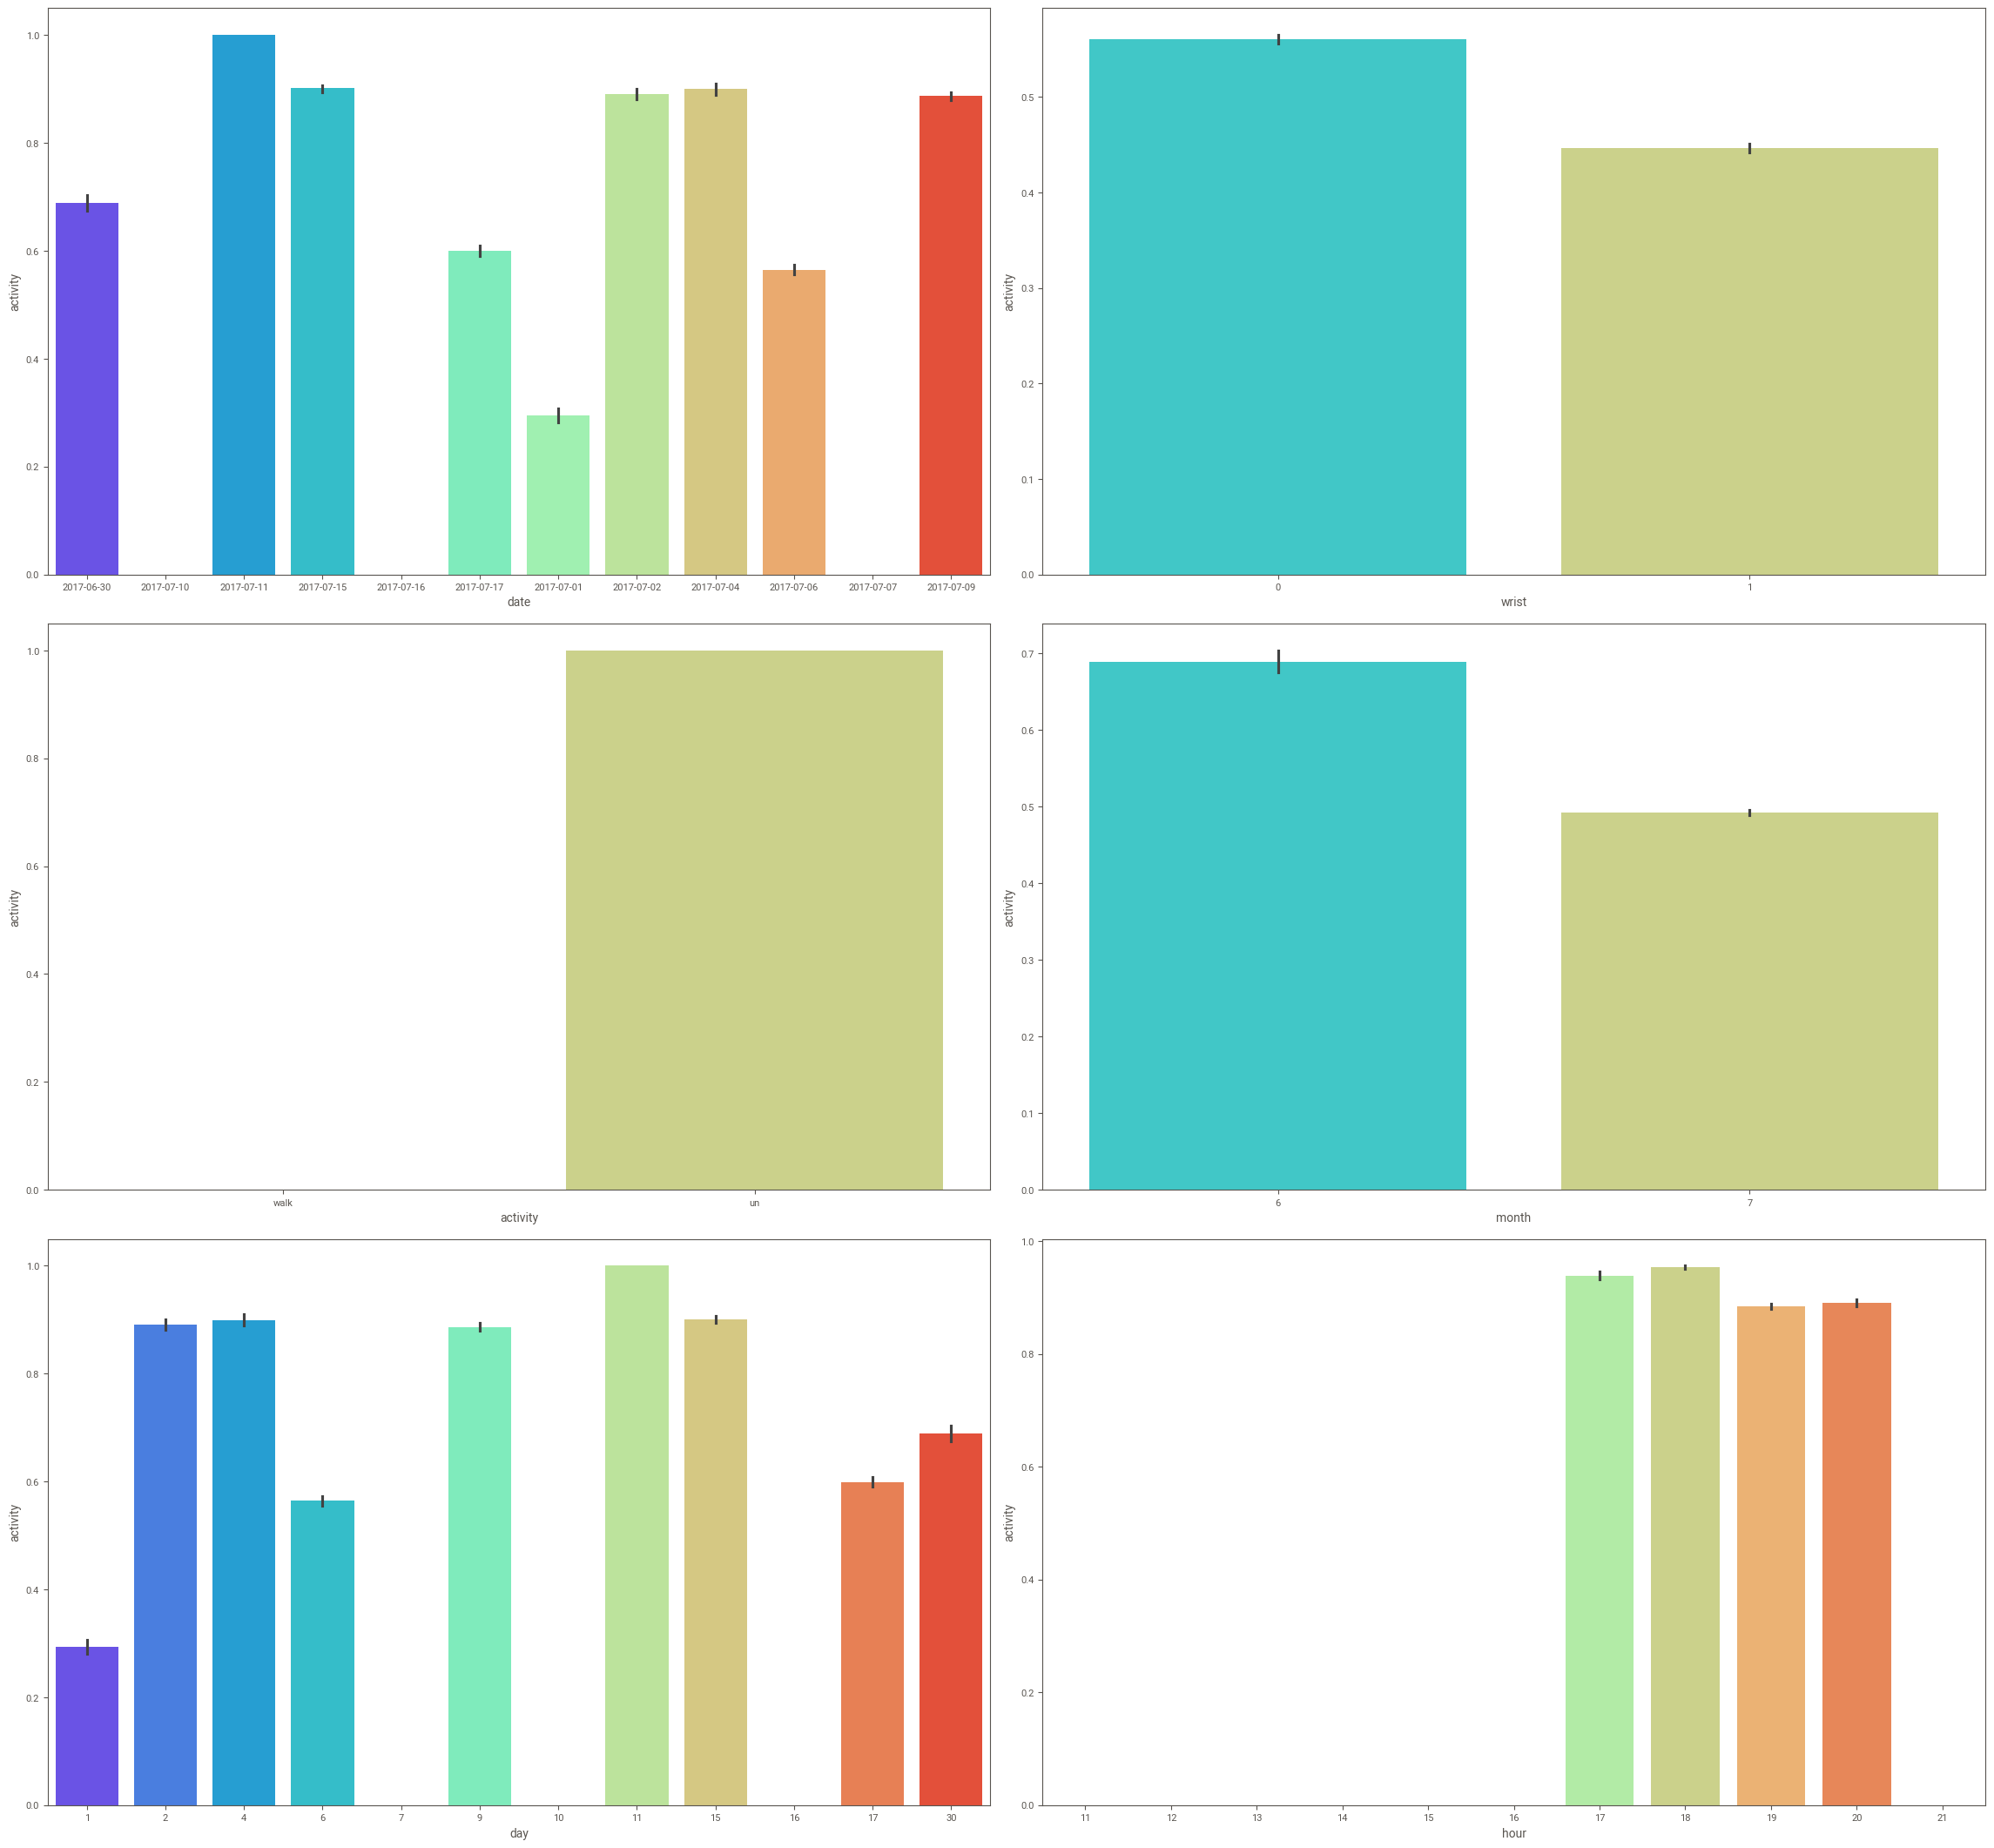

In [34]:
plt.figure(figsize=(23,28),facecolor='white')
plotnumber = 1

for column in df_dis:
    if plotnumber<=7:
        plt.subplot(4,2,plotnumber)
        sns.barplot(data = df,x=df_dis[column], y ='activity',palette='rainbow')
    plotnumber+=1
    
plt.tight_layout()  

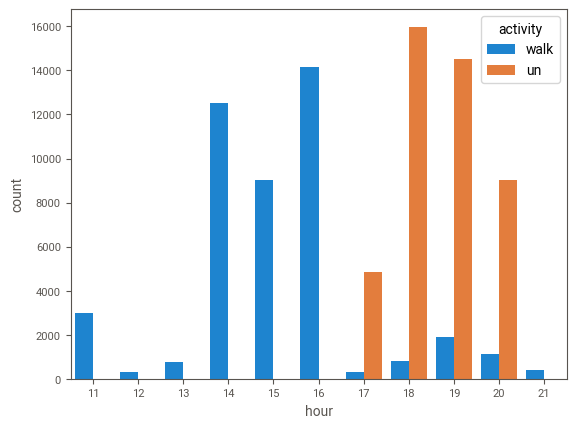

In [35]:
sns.countplot(data=df,x=df_dis['hour'], hue=df_dis['activity'])
plt.show()

#### Analysing accelerometer and gyroscope data

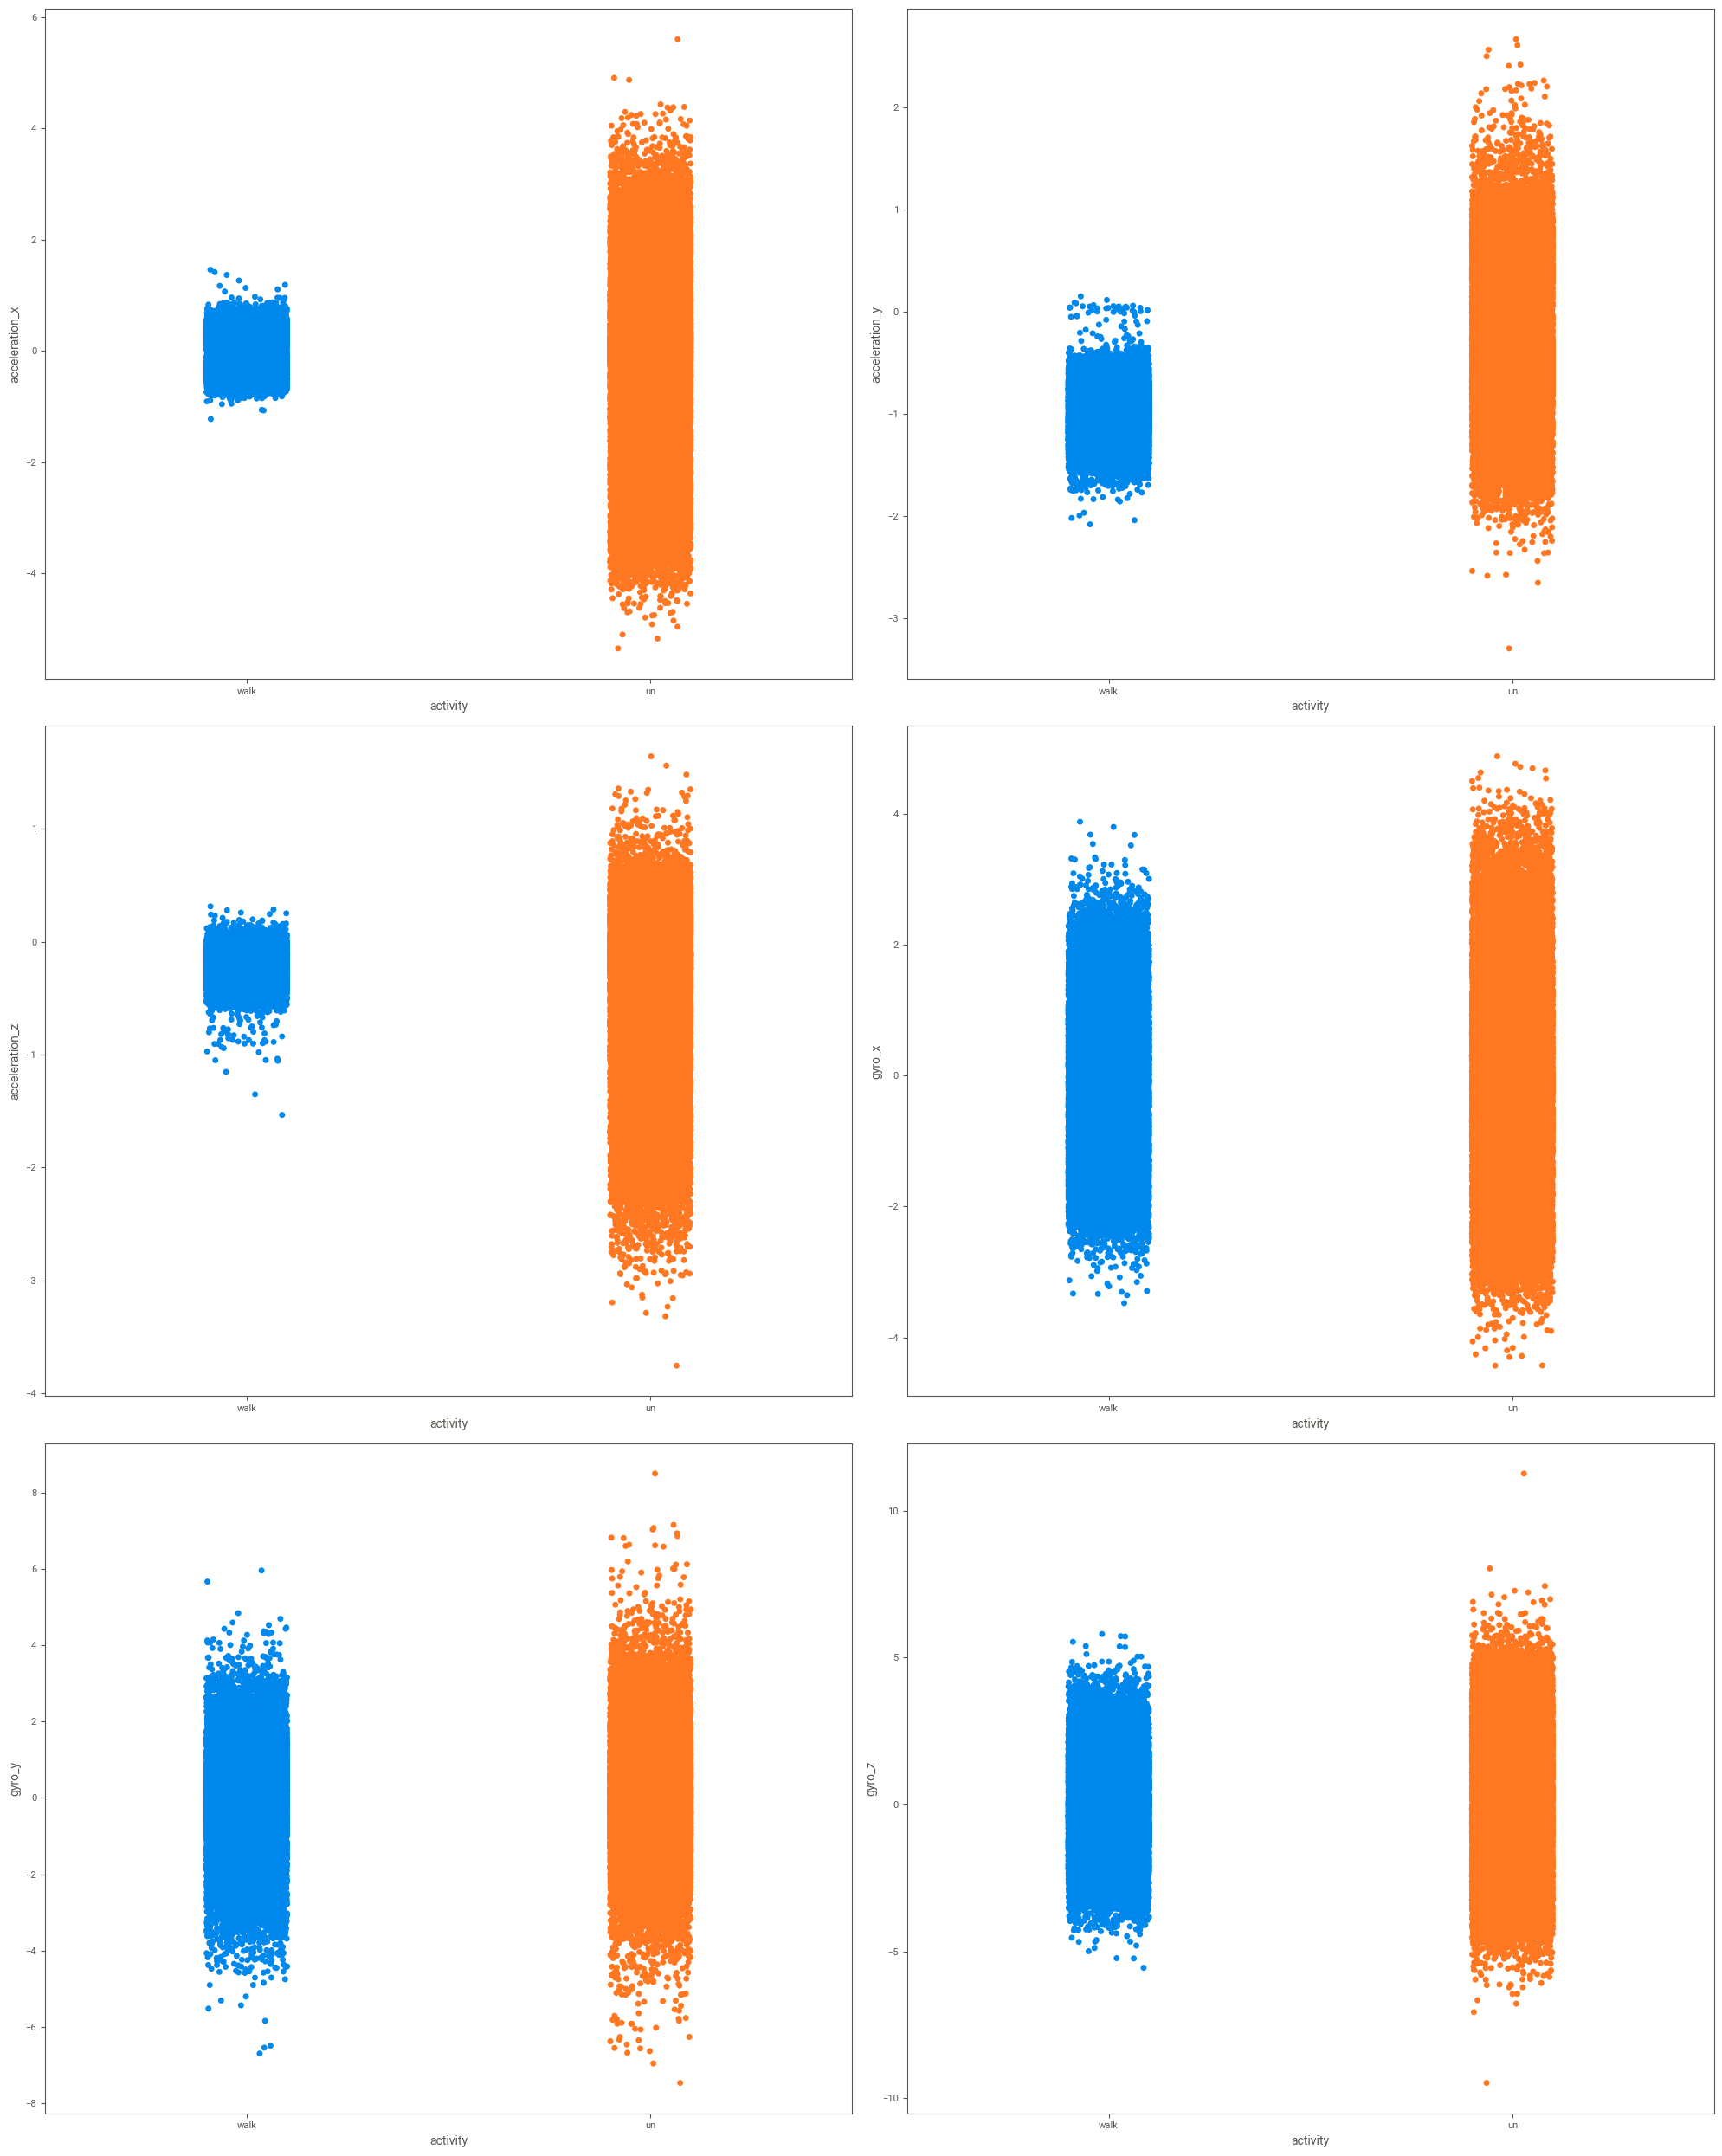

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in df_con.columns.values[0:6]:
    if plotnumber<=6:
        plt.subplot(3,2,plotnumber)
        sns.stripplot(data=df,x=df_dis['activity'],y=column,hue=df_dis["activity"])
    plotnumber+=1
    
plt.tight_layout()  


### Date and Time Analysis

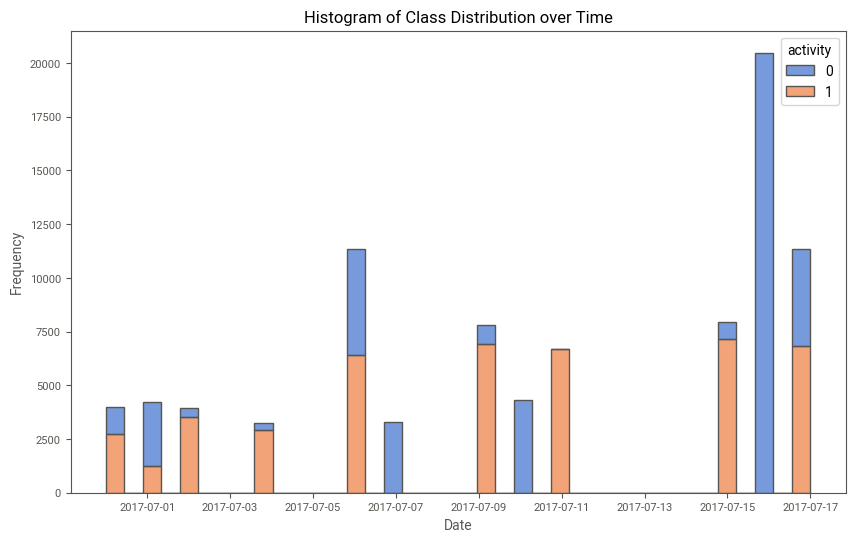

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='date', hue='activity', multiple='stack', palette='muted')
plt.title('Histogram of Class Distribution over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


In [38]:
df1.drop("username",axis=1,inplace=True)

### Hour and day of the week analysis

In [39]:
df2=df.copy()

In [40]:
df2['weekday'] = df2['date'].dt.weekday
df2['weekday_name'] = df2['date'].dt.day_name()


In [41]:
weekday_counts = df2['weekday'].value_counts().sort_index()
weekday_names = ['Monday', 'Tuesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

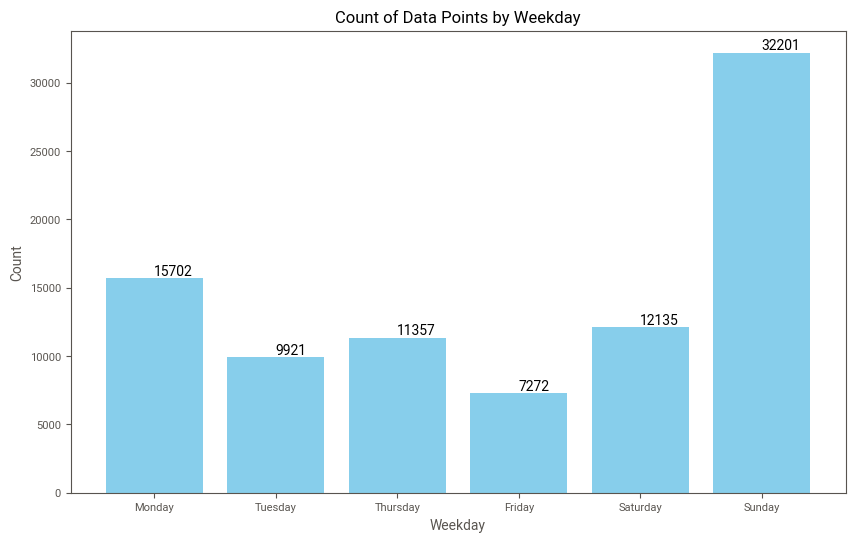

In [42]:
plt.figure(figsize=(10, 6))

bars = plt.bar(weekday_names, weekday_counts, color='skyblue')  # Create the bar plot

plt.title('Count of Data Points by Weekday')  # Set the title of the plot
plt.xlabel('Weekday')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis

# Add values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()  # Show the plot

In [43]:
dff=df.copy()

In [44]:
# Ensure that the 'Date' and 'Time' columns are strings before concatenation
dff['date'] = dff['date'].astype(str)
dff['time'] = dff['time'].astype(str)

# Convert Date and Time columns to datetime format and merge into a single column
dff['datetime'] = pd.to_datetime(dff['date'] + ' ' + dff['time'])

# Sort the data by datetime
dff.sort_values(by='datetime', inplace=True)

# Drop the original Date and Time columns
dff.drop(columns=['date', 'time'], inplace=True)

# Assuming your dataset looks like this:
# datetime, Feature1, Feature2, ..., Target
# Adjust column names and target variable accordingly
target_column = 'activity'  # Replace 'Target' with the name of your target variable column

# Set datetime as index (optional)
dff.set_index('datetime', inplace=True)


In [45]:
dff

wrist  activity  acceleration_x  \
datetime                                                            
2017-06-30 13:51:15.847724-01:00      0         0          0.2650   
2017-06-30 13:51:16.246945-01:00      0         0          0.6722   
2017-06-30 13:51:16.446233-01:00      0         0          0.4399   
2017-06-30 13:51:16.646117-01:00      0         0          0.3031   
2017-06-30 13:51:16.846738-01:00      0         0          0.4814   
...                                 ...       ...             ...   
2017-07-17 20:16:02.884990-01:00      1         1         -0.3145   
2017-07-17 20:16:03.285188-01:00      1         1          0.2041   
2017-07-17 20:16:03.485148-01:00      1         1         -2.9406   
2017-07-17 20:16:03.684989-01:00      1         1         -0.0219   
2017-07-17 20:16:03.851119-01:00      1         1         -2.1825   

                                  acceleration_y  acceleration_z  gyro_x  \
datetime                                                                   
2017-06-30 13:51:15.847724-01:00         -0.7814         -0.0076 -0.0590   
2017-06-30 13:51:16.246945-01:00         -1.1233         -0.2344 -0.1757   
2017-06-30 13:51:16.446233-01:00         -1.4817          0.0722 -0.9105   
2017-06-30 13:51:16.646117-01:00         -0.8125          0.0888  0.1199   
2017-06-30 13:51:16.846738-01:00         -0.9312          0.0359  0.0527   
...                                          ...             ...     ...   
2017-07-17 20:16:02.884990-01:00         -0.5619          0.2554 -1.4393   
2017-07-17 20:16:03.285188-01:00          0.4117         -0.1134  0.8280   
2017-07-17 20:16:03.485148-01:00          0.4090          0.0523  2.2648   
2017-07-17 20:16:03.684989-01:00         -0.5711          0.1658  0.2210   
2017-07-17 20:16:03.851119-01:00          0.1876          0.0430 -2.2937   

                                  gyro_y  gyro_z  year  month  day  hour  \
datetime                                                                   
2017-06-30 13:51:15.847724-01:00  0.0325 -2.9296  2017      6   30    13   
2017-06-30 13:51:16.246945-01:00  0.0208  0.1269  2017      6   30    13   
2017-06-30 13:51:16.446233-01:00  0.1063 -2.4367  2017      6   30    13   
2017-06-30 13:51:16.646117-01:00 -0.4099 -2.9336  2017      6   30    13   
2017-06-30 13:51:16.846738-01:00  0.4379  2.4922  2017      6   30    13   
...                                  ...     ...   ...    ...  ...   ...   
2017-07-17 20:16:02.884990-01:00  0.1370 -1.5961  2017      7   17    20   
2017-07-17 20:16:03.285188-01:00  0.8089  1.9331  2017      7   17    20   
2017-07-17 20:16:03.485148-01:00  0.2342  3.7748  2017      7   17    20   
2017-07-17 20:16:03.684989-01:00 -1.5538  0.6392  2017      7   17    20   
2017-07-17 20:16:03.851119-01:00 -0.6059 -0.6293  2017      7   17    20   

                                  minute  
datetime                                  
2017-06-30 13:51:15.847724-01:00      51  
2017-06-30 13:51:16.246945-01:00      51  
2017-06-30 13:51:16.446233-01:00      51  
2017-06-30 13:51:16.646117-01:00      51  
2017-06-30 13:51:16.846738-01:00      51  
...                                  ...  
2017-07-17 20:16:02.884990-01:00      16  
2017-07-17 20:16:03.285188-01:00      16  
2017-07-17 20:16:03.485148-01:00      16  
2017-07-17 20:16:03.684989-01:00      16  
2017-07-17 20:16:03.851119-01:00      16  

[88588 rows x 13 columns]

##### Sorting the datetime index

In [46]:
## Befor Sort
print(dff.index[-1])

dff.sort_index(inplace=True)

## After Sort
print(dff.index[-1])

2017-07-17 20:16:03.851119-01:00
2017-07-17 20:16:03.851119-01:00


In [47]:
## Datetime Analysis

print("Start time of the recording",dff.index.min())
print("End time of recording",dff.index.max())   
print("No of days of data collected",dff.index.day.nunique())

Start time of the recording 2017-06-30 13:51:15.847724-01:00
End time of recording 2017-07-17 20:16:03.851119-01:00
No of days of data collected 12


(array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]), array([ 2986,   294,   755, 12523,  9010, 14160,  5149, 16769, 16444,
       10120,   378], dtype=int64))


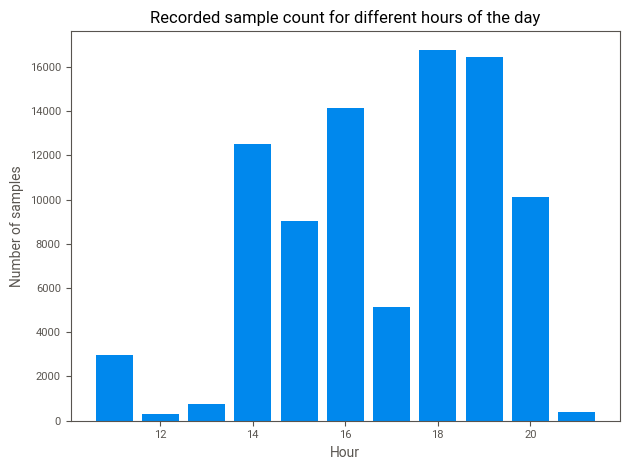

In [48]:
arr_hr = np.unique(dff.index.hour,return_counts=True)
print(arr_hr)

plt.bar(arr_hr[0],arr_hr[1])
plt.title("Recorded sample count for different hours of the day")
plt.xlabel("Hour")
plt.ylabel("Number of samples")
plt.tight_layout()
plt.show()

#### Heatmap Analysis for year and month

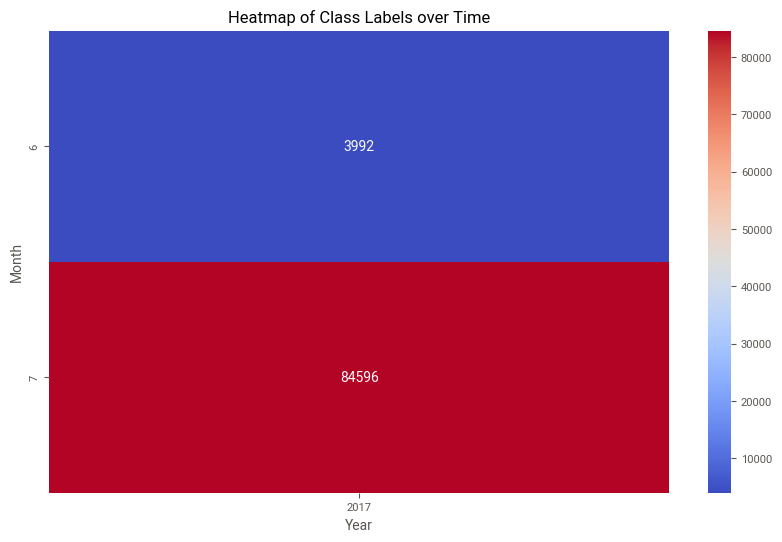

In [49]:
heatmap_data = df.pivot_table(index='month', columns='year', values='activity', aggfunc='count')
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.title('Heatmap of Class Labels over Time')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

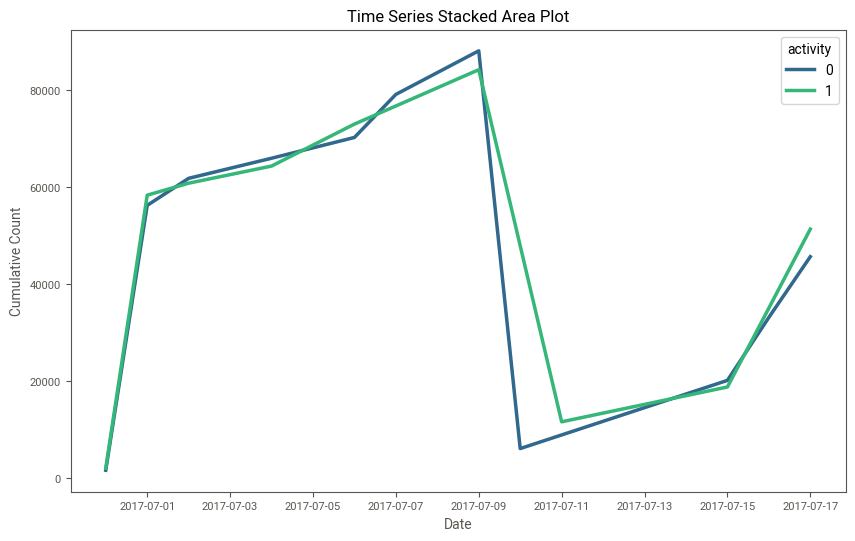

In [50]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='date', y=df.index, hue='activity', palette='viridis', linewidth=2.5)
plt.title('Time Series Stacked Area Plot')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.show()

### Insights:
 
- From the barplot above,we can see that there is no samples in 'wednesday'. We can concur that the person did   not walk or run in that current day.
- The peak walking activity occurred between 2 PM and 4 PM.
- The peak run activity occurred around 6 PM and 8 PM
- The walking activity around 4 PM had the highest count,  that the user might preferred to walk at that time.
- The runing activity around 6 PM had the highest count,  that the user might preferred to run at that time.
- gyroscope data on the look quite similar for walking and running.
   acceleration data shows clear difference between walking and running.
- The peak walking activity occurred on July 16, 2017, with the highest recorded count of approximately 20,000   steps.
- On 3,5 and 13 th of July no activities were recorded.
- The peak running activity occurred on July 11 2017, with the highest recorded count of approximately above     5000
- Sunday has the highest count of 32201 data points , the person did lot of activities as its a now work day.
- The least count of 7272 data points on Friday.
- The highest count of 84596 data is recorded in the month of July.
- From the plot above , we can infer that the person 'viktor' has walked more on 09-07-2017 and has walked less    on 10-07-2017.
- He has done more running on 17-07-2017 and less running on 11-07-2017.

# Multi-variate Analysis

<Figure size 10000x10000 with 0 Axes>

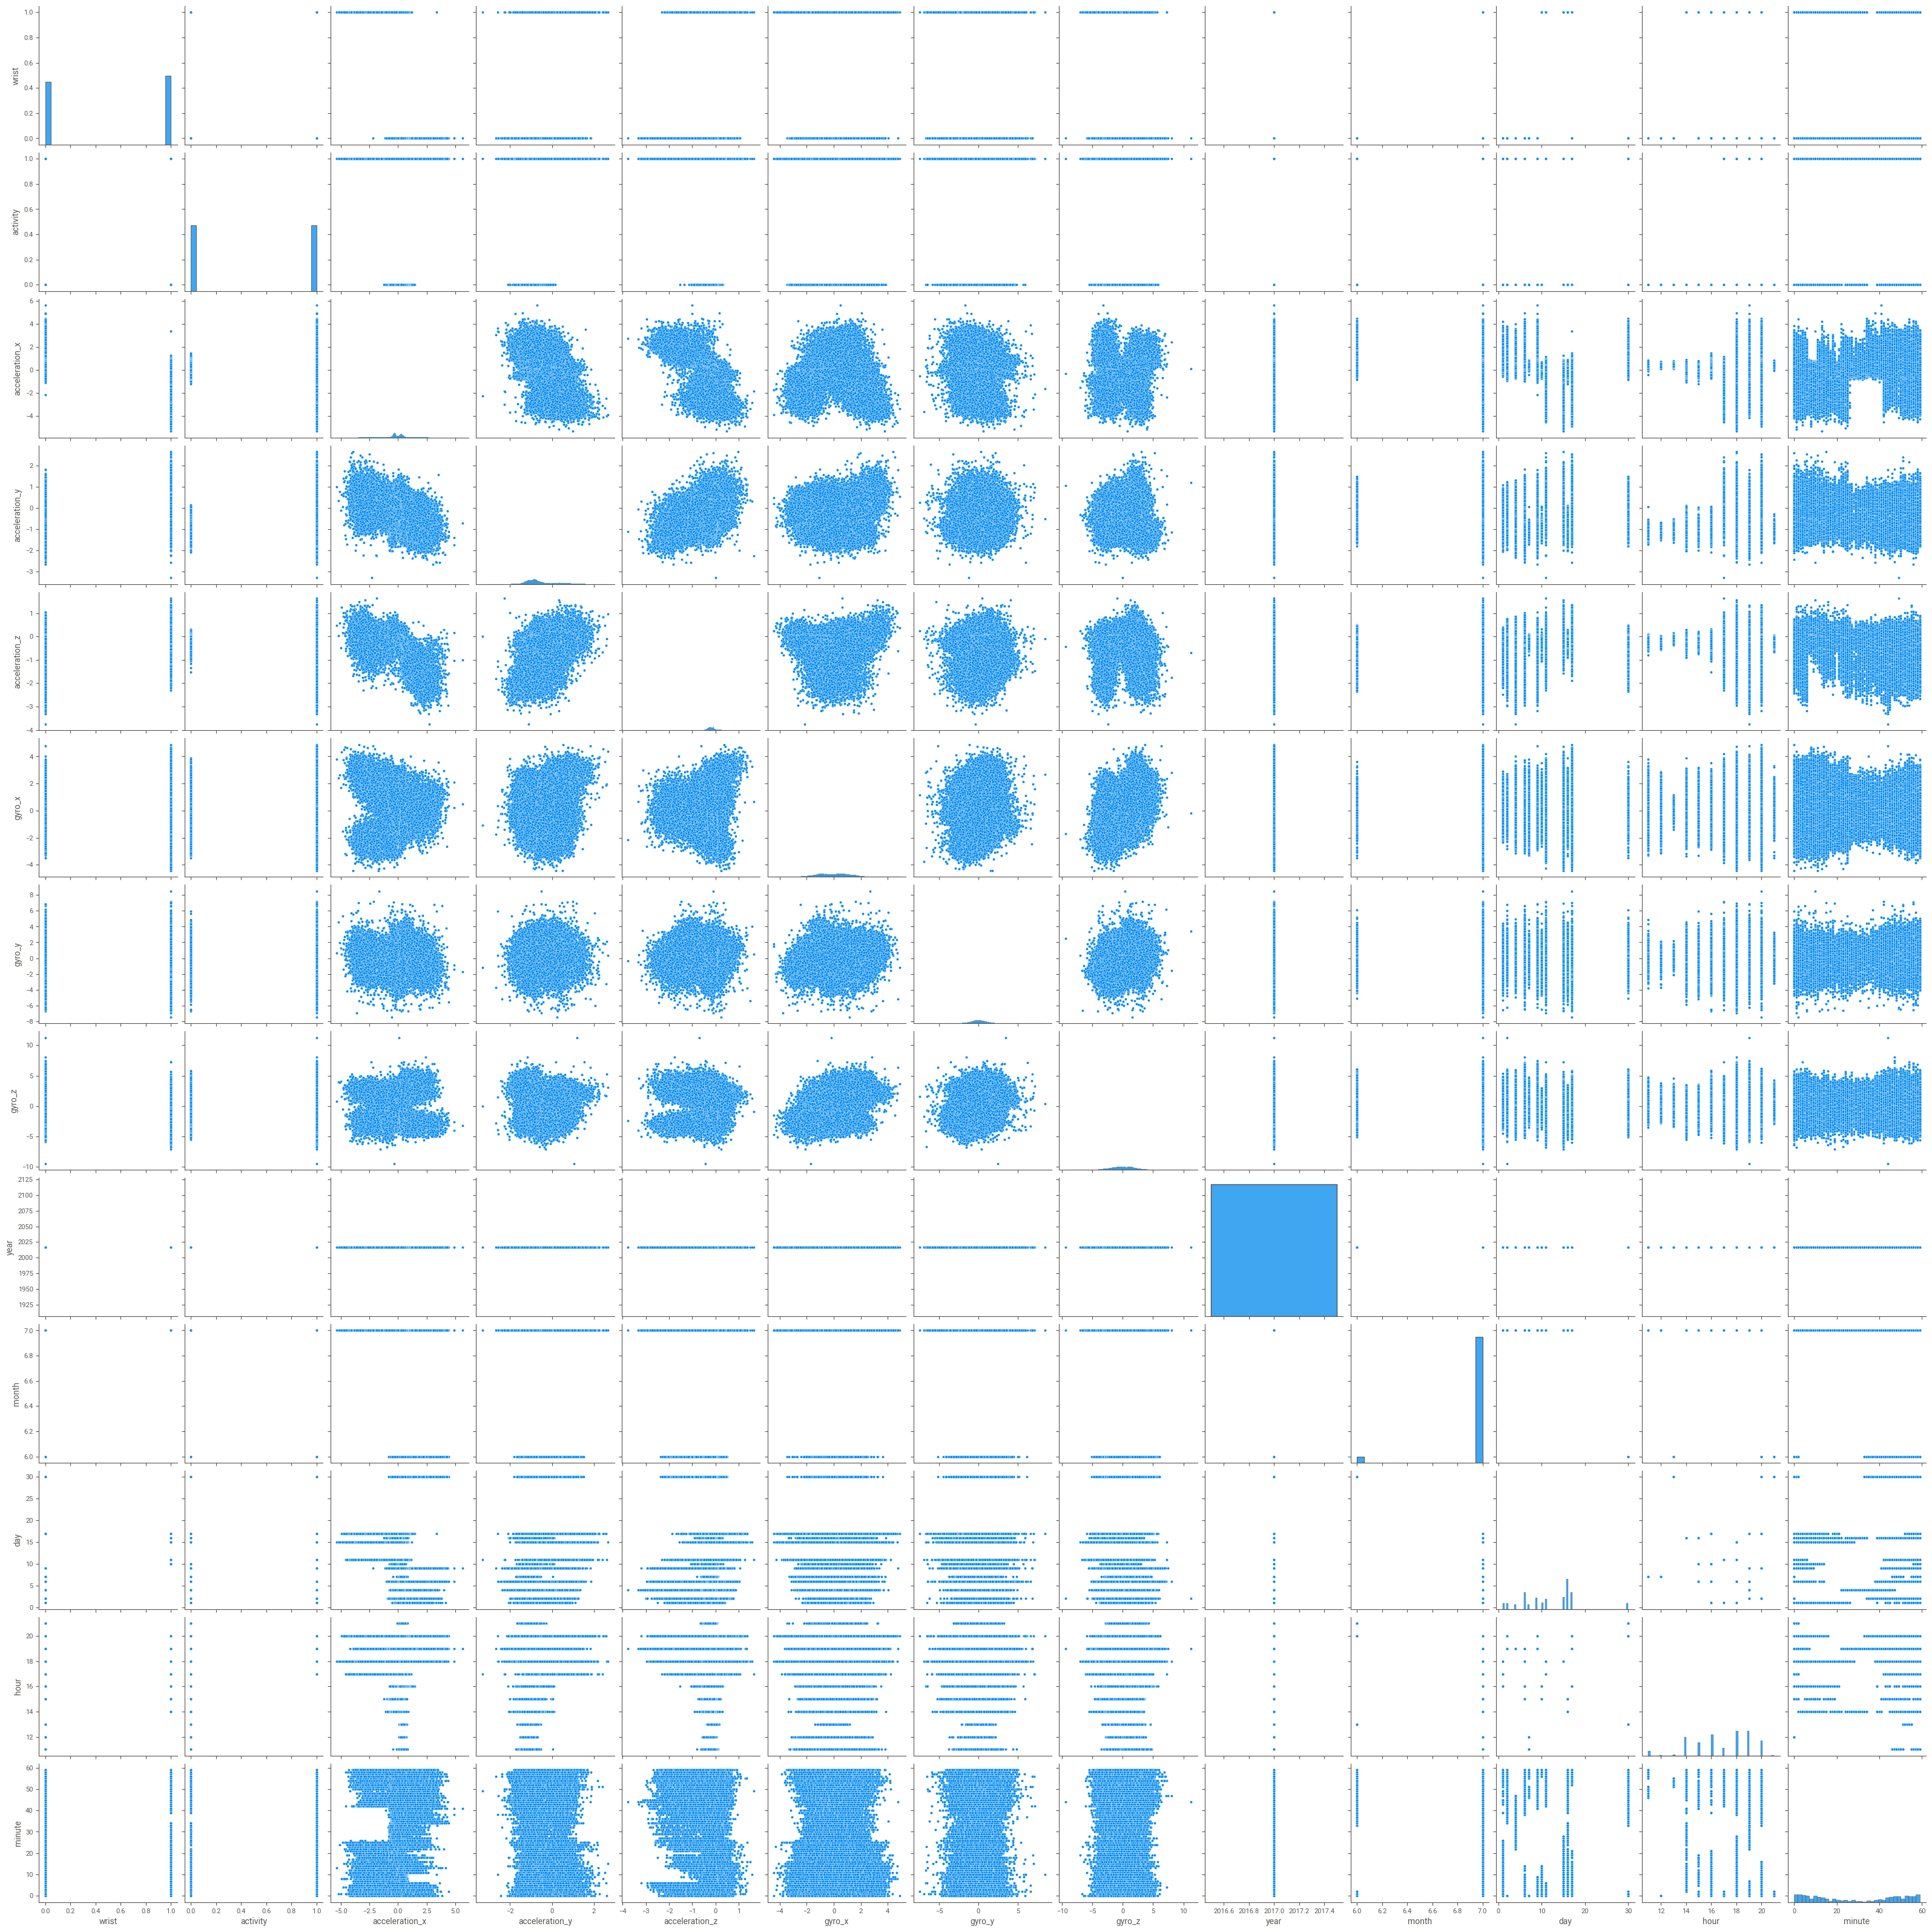

In [51]:
plt.figure(figsize=(100,100))
sns.pairplot(df)

# Data Preprocessing

In [52]:
df.isnull().sum()

date              0
time              0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
year              0
month             0
day               0
hour              0
minute            0
dtype: int64

In [53]:
df.duplicated().sum()

0

## Insights

* The data contains neither null values nor duplicates.

# Feature Selection

In [54]:
df.drop(['year','month','day','hour','minute','date','time'],axis=1,inplace=True)

In [55]:
df

wrist  activity  acceleration_x  acceleration_y  acceleration_z  \
0          0         0          0.2650         -0.7814         -0.0076   
1          0         0          0.6722         -1.1233         -0.2344   
2          0         0          0.4399         -1.4817          0.0722   
3          0         0          0.3031         -0.8125          0.0888   
4          0         0          0.4814         -0.9312          0.0359   
...      ...       ...             ...             ...             ...   
88583      0         0          0.3084         -0.8376         -0.1327   
88584      0         0          0.4977         -1.0027         -0.4397   
88585      0         0          0.4587         -1.1780         -0.2827   
88586      0         0          0.2590         -0.8582         -0.0759   
88587      0         0          0.3140         -0.8008         -0.0911   

       gyro_x  gyro_y  gyro_z  
0     -0.0590  0.0325 -2.9296  
1     -0.1757  0.0208  0.1269  
2     -0.9105  0.1063 -2.4367  
3      0.1199 -0.4099 -2.9336  
4      0.0527  0.4379  2.4922  
...       ...     ...     ...  
88583  0.4823  2.0124  0.6048  
88584  0.1022 -1.2565 -0.0761  
88585 -1.4500 -0.2792 -1.2616  
88586 -1.5165  0.4560 -1.7755  
88587  0.1183  1.0850  1.2814  

[88588 rows x 8 columns]

In [56]:
corr = df.corr()
corr

wrist  activity  acceleration_x  acceleration_y  \
wrist           1.000000 -0.113404       -0.609579        0.087091   
activity       -0.113404  1.000000       -0.017747        0.639520   
acceleration_x -0.609579 -0.017747        1.000000       -0.265169   
acceleration_y  0.087091  0.639520       -0.265169        1.000000   
acceleration_z  0.323680 -0.192435       -0.552374        0.106220   
gyro_x         -0.022092  0.040856       -0.021705        0.010549   
gyro_y         -0.068403  0.012055       -0.004091        0.072170   
gyro_z          0.008796 -0.008106       -0.060849       -0.022994   

                acceleration_z    gyro_x    gyro_y    gyro_z  
wrist                 0.323680 -0.022092 -0.068403  0.008796  
activity             -0.192435  0.040856  0.012055 -0.008106  
acceleration_x       -0.552374 -0.021705 -0.004091 -0.060849  
acceleration_y        0.106220  0.010549  0.072170 -0.022994  
acceleration_z        1.000000  0.035296 -0.021004  0.049621  
gyro_x                0.035296  1.000000  0.094011  0.317769  
gyro_y               -0.021004  0.094011  1.000000  0.287244  
gyro_z                0.049621  0.317769  0.287244  1.000000

In [57]:
corr[corr>0.70]

wrist  activity  acceleration_x  acceleration_y  \
wrist             1.0       NaN             NaN             NaN   
activity          NaN       1.0             NaN             NaN   
acceleration_x    NaN       NaN             1.0             NaN   
acceleration_y    NaN       NaN             NaN             1.0   
acceleration_z    NaN       NaN             NaN             NaN   
gyro_x            NaN       NaN             NaN             NaN   
gyro_y            NaN       NaN             NaN             NaN   
gyro_z            NaN       NaN             NaN             NaN   

                acceleration_z  gyro_x  gyro_y  gyro_z  
wrist                      NaN     NaN     NaN     NaN  
activity                   NaN     NaN     NaN     NaN  
acceleration_x             NaN     NaN     NaN     NaN  
acceleration_y             NaN     NaN     NaN     NaN  
acceleration_z             1.0     NaN     NaN     NaN  
gyro_x                     NaN     1.0     NaN     NaN  
gyro_y                     NaN     NaN     1.0     NaN  
gyro_z                     NaN     NaN     NaN     1.0

<Axes: >

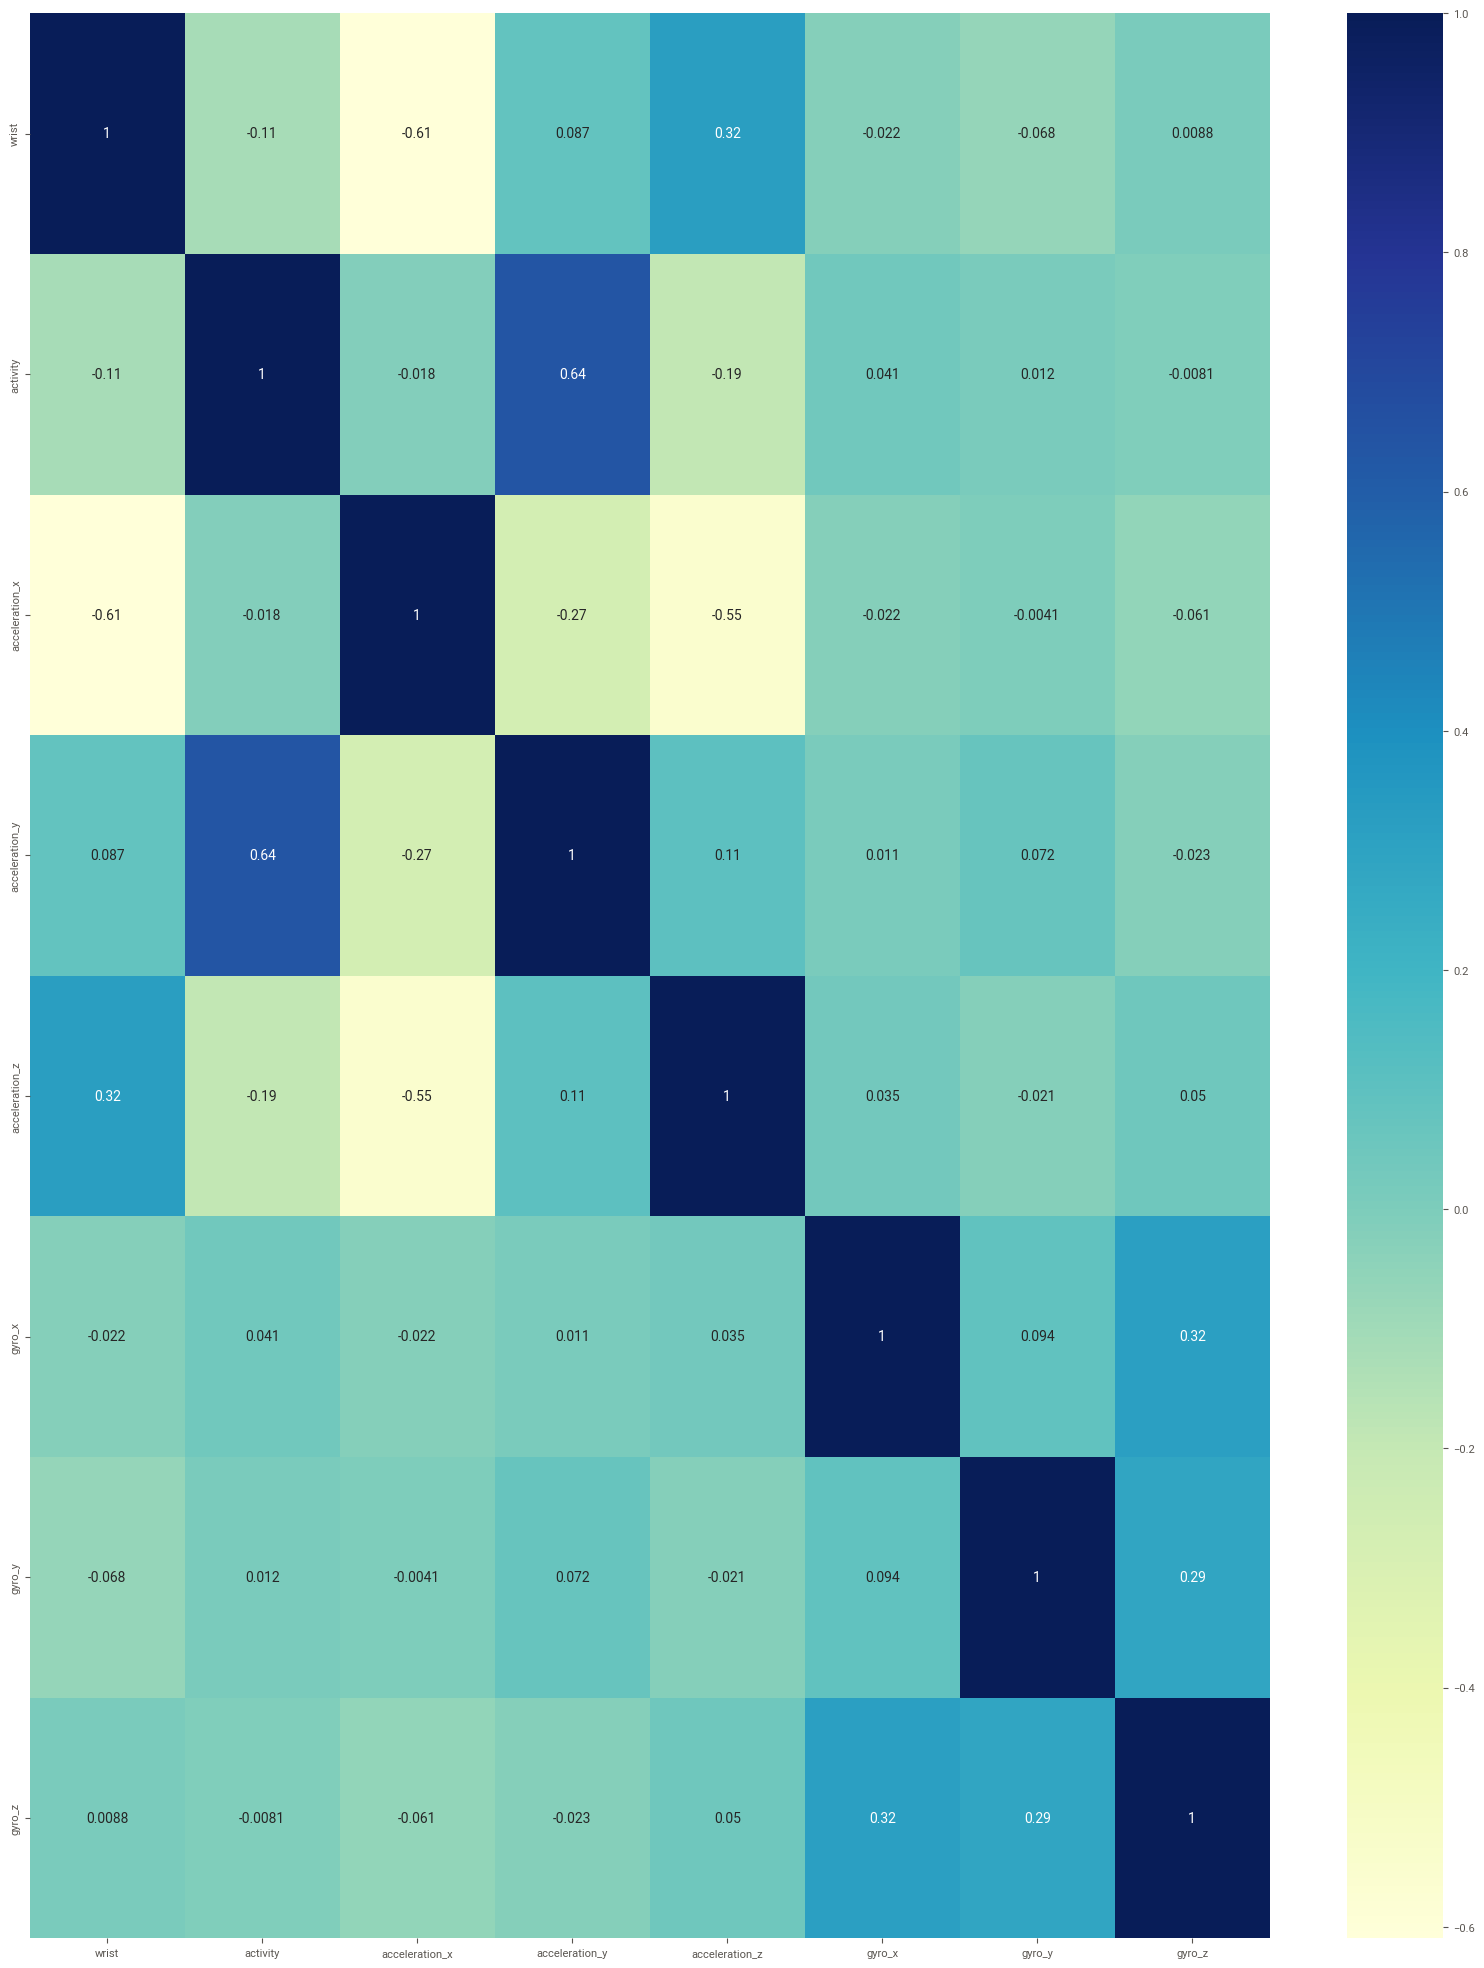

In [58]:
plt.figure(figsize=(20,25))
sns.heatmap(data=df.corr(),annot=True,cmap='YlGnBu')

## Insights

- The activity and acceleration_x is highly correlated - 67%
- The independent features in this dataset exhibit minimal correlation.

# Outliers 

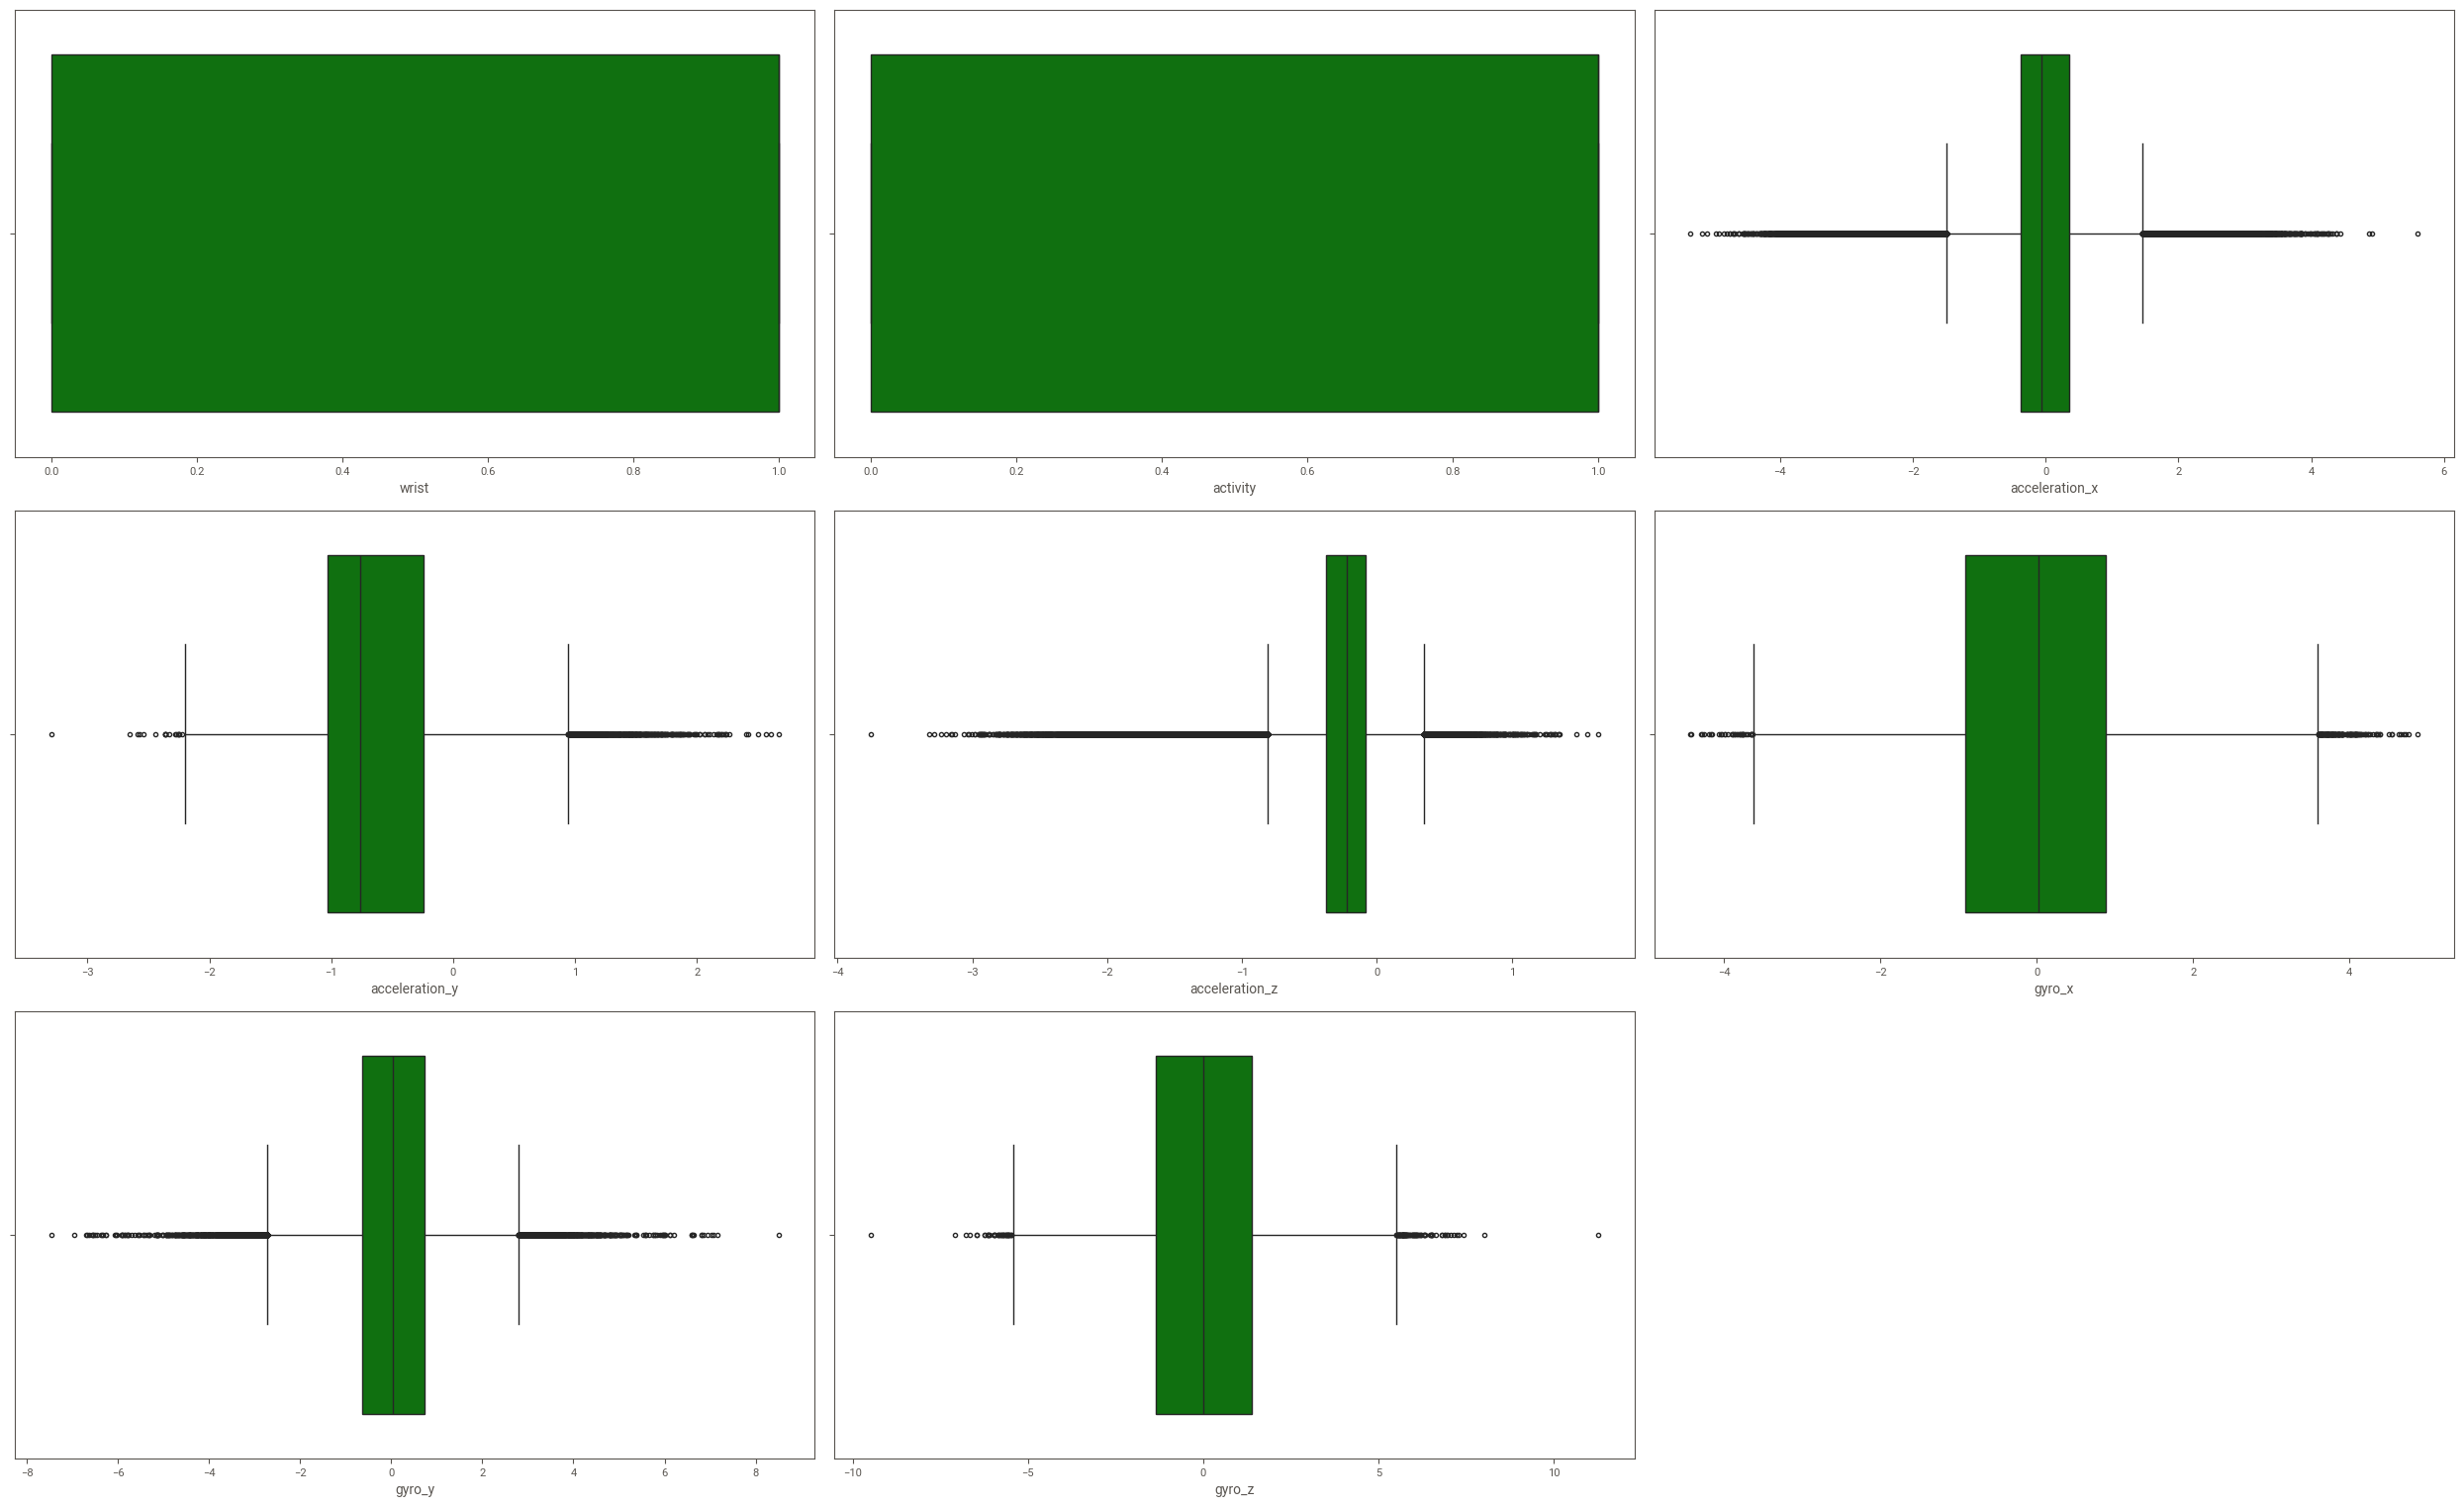

In [59]:
plt.figure(figsize=(25,20))
plotnum = 1

for column in df:
    if plotnum<=10:
        plt.subplot(4,3,plotnum)
        sns.boxplot(x=df[column],color='green')
        plt.xlabel(column)
    plotnum+=1
plt.tight_layout()    
    

#### Finding the sum of outliers and its percentage

In [60]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1

min_value = Q1-1.5*IQR

max_value = Q3+1.5*IQR

outliers_count = ((df>max_value) | (df<min_value)).sum()

outliers_percentage = (outliers_count/len(df))*100

print('\n Sum of outliers:\n',outliers_count)
print('\n Percentage of outliers:\n',outliers_percentage)


 Sum of outliers:
 wrist                 0
activity              0
acceleration_x    11594
acceleration_y     1588
acceleration_z    12637
gyro_x              225
gyro_y             3004
gyro_z              134
dtype: int64

 Percentage of outliers:
 wrist              0.000000
activity           0.000000
acceleration_x    13.087551
acceleration_y     1.792568
acceleration_z    14.264912
gyro_x             0.253985
gyro_y             3.390978
gyro_z             0.151262
dtype: float64


## Insights 

- The outliers does not have much impact on the data and We are going to perform scaling for this model to ensure that all features contribute equally to the model's performance. This helps in improving the convergence rate of gradient-based optimizers and avoids bias in the model due to the varying ranges of feature values


# Model Implementation

## LSTM Model

In [61]:

data

date                          time username  wrist  activity  \
0     2017-06-30 1900-01-01 13:51:15.847724020   viktor      0         0   
1     2017-06-30 1900-01-01 13:51:16.246945023   viktor      0         0   
2     2017-06-30 1900-01-01 13:51:16.446233987   viktor      0         0   
3     2017-06-30 1900-01-01 13:51:16.646117985   viktor      0         0   
4     2017-06-30 1900-01-01 13:51:16.846738994   viktor      0         0   
...          ...                           ...      ...    ...       ...   
88583 2017-07-09 1900-01-01 20:09:15.317911028   viktor      0         0   
88584 2017-07-09 1900-01-01 20:09:15.517889022   viktor      0         0   
88585 2017-07-09 1900-01-01 20:09:15.717828989   viktor      0         0   
88586 2017-07-09 1900-01-01 20:09:15.917932987   viktor      0         0   
88587 2017-07-09 1900-01-01 20:09:16.117410004   viktor      0         0   

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  \
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296   
1              0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269   
2              0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367   
3              0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336   
4              0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922   
...               ...             ...             ...     ...     ...     ...   
88583          0.3084         -0.8376         -0.1327  0.4823  2.0124  0.6048   
88584          0.4977         -1.0027         -0.4397  0.1022 -1.2565 -0.0761   
88585          0.4587         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616   
88586          0.2590         -0.8582         -0.0759 -1.5165  0.4560 -1.7755   
88587          0.3140         -0.8008         -0.0911  0.1183  1.0850  1.2814   

       year  month  day  hour  minute  
0      2017      6   30    13      51  
1      2017      6   30    13      51  
2      2017      6   30    13      51  
3      2017      6   30    13      51  
4      2017      6   30    13      51  
...     ...    ...  ...   ...     ...  
88583  2017      7    9    20       9  
88584  2017      7    9    20       9  
88585  2017      7    9    20       9  
88586  2017      7    9    20       9  
88587  2017      7    9    20       9  

[88588 rows x 16 columns]

In [62]:
data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S:%f')

In [63]:
import pandas as pd
import numpy as np

# Load your dataset
#data = pd.read_csv("your_dataset.csv")

# Ensure that the 'Date' and 'Time' columns are strings before concatenation
data['Date'] = data['date'].astype(str)
data['Time'] = data['time'].astype(str)

# Convert Date and Time columns to datetime format and merge into a single column
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Sort the data by datetime
data.sort_values(by='datetime', inplace=True)

# Drop the original Date and Time columns
data.drop(columns=['Date', 'Time'], inplace=True)

# Assuming your dataset looks like this:
# datetime, Feature1, Feature2, ..., Target
# Adjust column names and target variable accordingly
target_column = 'activity'  # Replace 'Target' with the name of your target variable column

# Set datetime as index (optional)
data.set_index('datetime', inplace=True) 


### Insights:

- We have set the set_index to combine the date and time into as single column and we have assigned it as index for the 'data' dataset. This was done to create a timestamp for the LSTM Model.(LSTM accepts Sequential Data).
- In the next step , we will drop the 'date' and 'time' column as we combined it and set it as index.
- we will drop the 'username' column because it has the same single value in all the records.

In [64]:
data

date                          time  \
datetime                                                                    
2017-06-30 13:51:15.847724-01:00 2017-06-30 1900-01-01 13:51:15.847724020   
2017-06-30 13:51:16.246945-01:00 2017-06-30 1900-01-01 13:51:16.246945023   
2017-06-30 13:51:16.446233-01:00 2017-06-30 1900-01-01 13:51:16.446233987   
2017-06-30 13:51:16.646117-01:00 2017-06-30 1900-01-01 13:51:16.646117985   
2017-06-30 13:51:16.846738-01:00 2017-06-30 1900-01-01 13:51:16.846738994   
...                                     ...                           ...   
2017-07-17 20:16:02.884990-01:00 2017-07-17 1900-01-01 20:16:02.884990990   
2017-07-17 20:16:03.285188-01:00 2017-07-17 1900-01-01 20:16:03.285188019   
2017-07-17 20:16:03.485148-01:00 2017-07-17 1900-01-01 20:16:03.485148012   
2017-07-17 20:16:03.684989-01:00 2017-07-17 1900-01-01 20:16:03.684989988   
2017-07-17 20:16:03.851119-01:00 2017-07-17 1900-01-01 20:16:03.851119750   

                                 username  wrist  activity  acceleration_x  \
datetime                                                                     
2017-06-30 13:51:15.847724-01:00   viktor      0         0          0.2650   
2017-06-30 13:51:16.246945-01:00   viktor      0         0          0.6722   
2017-06-30 13:51:16.446233-01:00   viktor      0         0          0.4399   
2017-06-30 13:51:16.646117-01:00   viktor      0         0          0.3031   
2017-06-30 13:51:16.846738-01:00   viktor      0         0          0.4814   
...                                   ...    ...       ...             ...   
2017-07-17 20:16:02.884990-01:00   viktor      1         1         -0.3145   
2017-07-17 20:16:03.285188-01:00   viktor      1         1          0.2041   
2017-07-17 20:16:03.485148-01:00   viktor      1         1         -2.9406   
2017-07-17 20:16:03.684989-01:00   viktor      1         1         -0.0219   
2017-07-17 20:16:03.851119-01:00   viktor      1         1         -2.1825   

                                  acceleration_y  acceleration_z  gyro_x  \
datetime                                                                   
2017-06-30 13:51:15.847724-01:00         -0.7814         -0.0076 -0.0590   
2017-06-30 13:51:16.246945-01:00         -1.1233         -0.2344 -0.1757   
2017-06-30 13:51:16.446233-01:00         -1.4817          0.0722 -0.9105   
2017-06-30 13:51:16.646117-01:00         -0.8125          0.0888  0.1199   
2017-06-30 13:51:16.846738-01:00         -0.9312          0.0359  0.0527   
...                                          ...             ...     ...   
2017-07-17 20:16:02.884990-01:00         -0.5619          0.2554 -1.4393   
2017-07-17 20:16:03.285188-01:00          0.4117         -0.1134  0.8280   
2017-07-17 20:16:03.485148-01:00          0.4090          0.0523  2.2648   
2017-07-17 20:16:03.684989-01:00         -0.5711          0.1658  0.2210   
2017-07-17 20:16:03.851119-01:00          0.1876          0.0430 -2.2937   

                                  gyro_y  gyro_z  year  month  day  hour  \
datetime                                                                   
2017-06-30 13:51:15.847724-01:00  0.0325 -2.9296  2017      6   30    13   
2017-06-30 13:51:16.246945-01:00  0.0208  0.1269  2017      6   30    13   
2017-06-30 13:51:16.446233-01:00  0.1063 -2.4367  2017      6   30    13   
2017-06-30 13:51:16.646117-01:00 -0.4099 -2.9336  2017      6   30    13   
2017-06-30 13:51:16.846738-01:00  0.4379  2.4922  2017      6   30    13   
...                                  ...     ...   ...    ...  ...   ...   
2017-07-17 20:16:02.884990-01:00  0.1370 -1.5961  2017      7   17    20   
2017-07-17 20:16:03.285188-01:00  0.8089  1.9331  2017      7   17    20   
2017-07-17 20:16:03.485148-01:00  0.2342  3.7748  2017      7   17    20   
2017-07-17 20:16:03.684989-01:00 -1.5538  0.6392  2017      7   17    20   
2017-07-17 20:16:03.851119-01:00 -0.6059 -0.6293  2017      7   17    20   

                                  minute  
d

In [65]:
data.drop(['date','time','username'],axis=1,inplace=True)

In [66]:
data

wrist  activity  acceleration_x  \
datetime                                                            
2017-06-30 13:51:15.847724-01:00      0         0          0.2650   
2017-06-30 13:51:16.246945-01:00      0         0          0.6722   
2017-06-30 13:51:16.446233-01:00      0         0          0.4399   
2017-06-30 13:51:16.646117-01:00      0         0          0.3031   
2017-06-30 13:51:16.846738-01:00      0         0          0.4814   
...                                 ...       ...             ...   
2017-07-17 20:16:02.884990-01:00      1         1         -0.3145   
2017-07-17 20:16:03.285188-01:00      1         1          0.2041   
2017-07-17 20:16:03.485148-01:00      1         1         -2.9406   
2017-07-17 20:16:03.684989-01:00      1         1         -0.0219   
2017-07-17 20:16:03.851119-01:00      1         1         -2.1825   

                                  acceleration_y  acceleration_z  gyro_x  \
datetime                                                                   
2017-06-30 13:51:15.847724-01:00         -0.7814         -0.0076 -0.0590   
2017-06-30 13:51:16.246945-01:00         -1.1233         -0.2344 -0.1757   
2017-06-30 13:51:16.446233-01:00         -1.4817          0.0722 -0.9105   
2017-06-30 13:51:16.646117-01:00         -0.8125          0.0888  0.1199   
2017-06-30 13:51:16.846738-01:00         -0.9312          0.0359  0.0527   
...                                          ...             ...     ...   
2017-07-17 20:16:02.884990-01:00         -0.5619          0.2554 -1.4393   
2017-07-17 20:16:03.285188-01:00          0.4117         -0.1134  0.8280   
2017-07-17 20:16:03.485148-01:00          0.4090          0.0523  2.2648   
2017-07-17 20:16:03.684989-01:00         -0.5711          0.1658  0.2210   
2017-07-17 20:16:03.851119-01:00          0.1876          0.0430 -2.2937   

                                  gyro_y  gyro_z  year  month  day  hour  \
datetime                                                                   
2017-06-30 13:51:15.847724-01:00  0.0325 -2.9296  2017      6   30    13   
2017-06-30 13:51:16.246945-01:00  0.0208  0.1269  2017      6   30    13   
2017-06-30 13:51:16.446233-01:00  0.1063 -2.4367  2017      6   30    13   
2017-06-30 13:51:16.646117-01:00 -0.4099 -2.9336  2017      6   30    13   
2017-06-30 13:51:16.846738-01:00  0.4379  2.4922  2017      6   30    13   
...                                  ...     ...   ...    ...  ...   ...   
2017-07-17 20:16:02.884990-01:00  0.1370 -1.5961  2017      7   17    20   
2017-07-17 20:16:03.285188-01:00  0.8089  1.9331  2017      7   17    20   
2017-07-17 20:16:03.485148-01:00  0.2342  3.7748  2017      7   17    20   
2017-07-17 20:16:03.684989-01:00 -1.5538  0.6392  2017      7   17    20   
2017-07-17 20:16:03.851119-01:00 -0.6059 -0.6293  2017      7   17    20   

                                  minute  
datetime                                  
2017-06-30 13:51:15.847724-01:00      51  
2017-06-30 13:51:16.246945-01:00      51  
2017-06-30 13:51:16.446233-01:00      51  
2017-06-30 13:51:16.646117-01:00      51  
2017-06-30 13:51:16.846738-01:00      51  
...                                  ...  
2017-07-17 20:16:02.884990-01:00      16  
2017-07-17 20:16:03.285188-01:00      16  
2017-07-17 20:16:03.485148-01:00      16  
2017-07-17 20:16:03.684989-01:00      16  
2017-07-17 20:16:03.851119-01:00      16  

[88588 rows x 13 columns]

#### Spliiting the Data

In [67]:
x=data.drop('activity',axis=1)
y=data.activity

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70870, 12)
(17718, 12)
(70870,)
(17718,)


#### Scaling 

In [70]:
from sklearn.preprocessing import StandardScaler # (We have used Standard Scaler instead MinMax Scaler for Normalization)

scaler = StandardScaler()

# Fit scaler on training data
X_train_scaled = scaler.fit_transform(x_train)

# Transform testing data
X_test_scaled = scaler.transform(x_test)

In [71]:
### Converted into 3-D Array

### Insights
- We have converted the x_train_scaled and x_test_scaled variable into 3D Array because the LSTM Model accepts only 3D Arrays. 

In [72]:
X_train_scaled=np.array(X_train_scaled)
y_train=np.array(y_train)
X_test_scaled=np.array(X_test_scaled)
y_test=np.array(y_test)

In [73]:
X_train_scaled=np.reshape(X_train_scaled,(X_train_scaled.shape[0],X_train_scaled.shape[1],1))
X_test_scaled=np.reshape(X_test_scaled,(X_test_scaled.shape[0],X_test_scaled.shape[1],1))
y_train=np.reshape(y_train,(-1,1))
y_test=np.reshape(y_test,(-1,1))

In [74]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(70870, 12, 1)
(17718, 12, 1)
(70870, 1)
(17718, 1)


### Model Implementation

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

sequence_length = 50



model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


### Insights:
- We have used sigmoid function dense =1 for Binary Classification.
- We have assigned the length of the sequence as 50.
- We have used Binary Cross Entropy for Loss function and Accuracy Score in Metrics.

#### Training the Model

In [76]:
history = model.fit(
    X_train_scaled, y_train, 
    epochs=35, 
    batch_size=32, 
    validation_data=(X_test_scaled, y_test), 
    callbacks=[early_stopping]
)


Epoch 1/35
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 34s 14ms/step - accuracy: 0.8903 - loss: 0.2413 - val_accuracy: 0.9841 - val_loss: 0.0451
Epoch 2/35
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.9834 - loss: 0.0428 - val_accuracy: 0.9914 - val_loss: 0.0235
Epoch 3/35
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.9914 - loss: 0.0238 - val_accuracy: 0.9948 - val_loss: 0.0141
Epoch 4/35
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9947 - loss: 0.0159 - val_accuracy: 0.9961 - val_loss: 0.0114
Epoch 5/35
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.9956 - loss: 0.0123 - val_accuracy: 0.9970 - val_loss: 0.0088
Epoch 6/35
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.9964 - loss: 0.0110 - val_accuracy: 0.9976 - val_loss: 0.0073
Epoch 7/35
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.9971 - loss: 0.0080 - val_accuracy: 0.9977 - val_loss: 0.0070
Epoch 8/35
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9972 -

In [77]:
predictions = model.predict(X_test_scaled)


554/554 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


#### Model Evaluation

In [78]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

# Predict classes for the test set
y_pred = (predictions > 0.5).astype(int)

# Compute accuracy score
acc_lstm = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_lstm)

f1_lstm = f1_score(y_test,y_pred)
print("F1_score",f1_lstm)


Accuracy Score: 0.9988147646461226
F1_score 0.9988153663902521


# Spliting of the data

In [79]:
x = df.drop(('activity'),axis=1)
y = df.activity

In [80]:
x

wrist  acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  \
0          0          0.2650         -0.7814         -0.0076 -0.0590  0.0325   
1          0          0.6722         -1.1233         -0.2344 -0.1757  0.0208   
2          0          0.4399         -1.4817          0.0722 -0.9105  0.1063   
3          0          0.3031         -0.8125          0.0888  0.1199 -0.4099   
4          0          0.4814         -0.9312          0.0359  0.0527  0.4379   
...      ...             ...             ...             ...     ...     ...   
88583      0          0.3084         -0.8376         -0.1327  0.4823  2.0124   
88584      0          0.4977         -1.0027         -0.4397  0.1022 -1.2565   
88585      0          0.4587         -1.1780         -0.2827 -1.4500 -0.2792   
88586      0          0.2590         -0.8582         -0.0759 -1.5165  0.4560   
88587      0          0.3140         -0.8008         -0.0911  0.1183  1.0850   

       gyro_z  
0     -2.9296  
1      0.1269  
2     -2.4367  
3     -2.9336  
4      2.4922  
...       ...  
88583  0.6048  
88584 -0.0761  
88585 -1.2616  
88586 -1.7755  
88587  1.2814  

[88588 rows x 7 columns]

In [81]:
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

### train,test split

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70870, 7)
(17718, 7)
(70870,)
(17718,)


# Scaling

In [84]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()

In [85]:
x_train.columns

Index(['wrist', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x',
       'gyro_y', 'gyro_z'],
      dtype='object')

In [86]:
x_train[['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']]=S.fit_transform(x_train[['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']])
x_test[['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']] = S.transform(x_test[['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']])

In [87]:
x_train

wrist  acceleration_x  acceleration_y  acceleration_z    gyro_x  \
37105      1       -0.352557       -0.581810        0.318432  0.407375   
54378      1       -3.499042        1.665535        1.909424  3.240725   
86477      0       -0.399652        0.942316       -1.242739 -0.152526   
84774      0        0.045823        0.183217        0.865901  1.471707   
19425      1       -0.559678        0.187474        0.621782  0.355655   
...      ...             ...             ...             ...       ...   
6265       1       -0.097050       -0.675918        0.185987 -1.190838   
54886      0        0.566651       -0.771851        0.268662  0.807567   
76820      0        0.415846       -0.449998        0.520803 -0.547451   
860        0       -0.405105       -0.001806        0.764305  0.327959   
15795      1       -0.413136        1.494650        0.345168  1.688963   

         gyro_y    gyro_z  
37105 -0.006376 -0.700199  
54378  2.195869  1.243522  
86477 -0.113476 -0.055092  
84774 -0.350061  0.455046  
19425 -0.596132 -0.095368  
...         ...       ...  
6265   0.115536  0.879049  
54886  0.804154  1.683019  
76820 -0.092672 -0.710424  
860    0.439665  0.338912  
15795 -0.196942  2.129455  

[70870 rows x 7 columns]

In [88]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70870 entries, 37105 to 15795
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wrist           70870 non-null  int64  
 1   acceleration_x  70870 non-null  float64
 2   acceleration_y  70870 non-null  float64
 3   acceleration_z  70870 non-null  float64
 4   gyro_x          70870 non-null  float64
 5   gyro_y          70870 non-null  float64
 6   gyro_z          70870 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 4.3 MB


### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()

In [90]:
model_logistic.fit(x_train,y_train)

LogisticRegression()

In [91]:
y_pred_log = model_logistic.predict(x_test)
y_pred_log

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

## Model Evaluation

In [92]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [93]:
acc_log = accuracy_score(y_test,y_pred_log)
acc_log

0.8634721751890733

In [94]:
f1_log = f1_score(y_test,y_pred_log)
f1_log

0.8559003991183654

In [95]:
cm_log = confusion_matrix(y_test,y_pred_log)
cm_log

array([[8115,  798],
       [1621, 7184]], dtype=int64)

In [96]:
pd.crosstab(y_test,y_pred_log)

col_0        0     1
activity            
0         8115   798
1         1621  7184

In [97]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      8913
           1       0.90      0.82      0.86      8805

    accuracy                           0.86     17718
   macro avg       0.87      0.86      0.86     17718
weighted avg       0.87      0.86      0.86     17718



## SVM

In [98]:
from sklearn.svm import SVC
model_svm = SVC()

In [99]:
model_svm.fit(x_train,y_train)


SVC()

In [100]:
y_pred_svm = model_svm.predict(x_test)
y_pred_svm

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [101]:
acc_svm = accuracy_score(y_test,y_pred_svm)
acc_svm

0.9917033525228581

In [102]:
f1_svm = f1_score(y_test,y_pred_svm)
f1_svm

0.9916282248419613

In [103]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_svm

array([[8865,   48],
       [  99, 8706]], dtype=int64)

In [104]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



## DecisionTree

In [105]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [106]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [107]:
y_pred_dt = model_dt.predict(x_test)
y_pred_dt

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [108]:
acc_dt = accuracy_score(y_test,y_pred_dt)
acc_dt

0.9839711028332769

In [109]:
f1_dt = f1_score(y_test,y_pred_dt)
f1_dt

0.9839038766719564

In [110]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_dt

array([[8754,  159],
       [ 125, 8680]], dtype=int64)

In [111]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8913
           1       0.98      0.99      0.98      8805

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718



## RandomForest 

In [112]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [113]:
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
y_pred_rf = model_rf.predict(x_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Model Evaluation 

In [115]:
acc_rf = accuracy_score(y_test,y_pred_rf)
acc_rf

0.9917597923016142

In [116]:
f1_rf = f1_score(y_test,y_pred_rf)
f1_rf

0.9917139614074916

In [117]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[8835,   78],
       [  68, 8737]], dtype=int64)

In [118]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



## Gradient Boosting 

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()

In [120]:
model_gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [121]:
y_pred_gb = model_gb.predict(x_test)
y_pred_gb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Model Evaluation

In [122]:
acc_gb = accuracy_score(y_test,y_pred_gb)
acc_gb

0.9860029348684953

In [123]:
f1_gb = f1_score(y_test,y_pred_gb)
f1_gb

0.9858721658881167

In [124]:
cm_gb = confusion_matrix(y_test,y_pred_gb)
cm_gb

array([[8817,   96],
       [ 152, 8653]], dtype=int64)

In [125]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8913
           1       0.99      0.98      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



## XGB

In [126]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=100)

In [127]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [128]:
y_pred_xgb = model_xgb.predict(x_test)
y_pred_xgb

array([1, 1, 1, ..., 1, 1, 1])

## Model Evaluation

In [129]:
acc_xgb = accuracy_score(y_test,y_pred_xgb)
acc_xgb

0.9930014674342477

In [130]:
f1_xgb = f1_score(y_test,y_pred_xgb)
f1_xgb

0.9929577464788732

In [131]:
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
cm_xgb

array([[8852,   61],
       [  63, 8742]], dtype=int64)

In [132]:
pd.crosstab(y_test,y_pred_xgb)

col_0        0     1
activity            
0         8852    61
1           63  8742

In [133]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



## Stacking Regression

In [134]:
from sklearn.ensemble import StackingClassifier

In [135]:
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC(probability=True))]

In [136]:
meta_model = LogisticRegression(max_iter=1000)


In [137]:
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

In [138]:
stacking_classifier.fit(x_train, y_train)

# Predictions
y_pred_sc = stacking_classifier.predict(x_test)
y_pred_sc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Model Evaluation

In [139]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [140]:
acc_sc = accuracy_score(y_test,y_pred_sc)
acc_sc

0.9920419911953945

In [141]:
f1_sc = f1_score(y_test,y_pred_sc)
f1_sc

0.9919918214346566

In [142]:
cm_sc = confusion_matrix(y_test,y_pred_sc)
cm_sc

array([[8844,   69],
       [  72, 8733]], dtype=int64)

## Hyperparameter Tuning

### XG Boosting

In [143]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier()

param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 6),
    'subsample': uniform(0.5, 1),
    'colsample_bytree': uniform(0.5, 1),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0.01, 10)
}

random_search = RandomizedSearchCV(estimator=xgb,param_distributions=param_dist,n_iter=100,scoring='accuracy',cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1)

random_search.fit(x_train, y_train)

best_params =random_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'colsample_bytree': 0.7652023676817254, 'gamma': 0.12199482168954179, 'learning_rate': 0.30190316642573367, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 231, 'reg_alpha': 0.906098787718554, 'reg_lambda': 4.3539436551042865, 'subsample': 0.8500784076946757}


In [144]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'colsample_bytree': 0.7652023676817254, 'gamma': 0.12199482168954179, 'learning_rate': 0.30190316642573367, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 231, 'reg_alpha': 0.906098787718554, 'reg_lambda': 4.3539436551042865, 'subsample': 0.8500784076946757}


### Retraining the model

In [145]:
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7652023676817254, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.12199482168954179, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.30190316642573367, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=231, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0.906098787718554,
              reg_lambda=4.3539436551042865, ...)

In [146]:
y_pred = best_xgb.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [147]:
accuracy_score(y_test,y_pred)

0.9926628287617113

## Model Comparison plot

In [148]:
data = {"Accuracy_score" :[acc_log,acc_svm,acc_dt,acc_rf,acc_gb,acc_xgb,acc_sc,acc_lstm],
     "Model" :['Logistic Regression','SVM','Decision Tree','Random Forest','Gradient Boosting','XGB','Stacking Regression','LSTM']}

In [149]:
data_acc = pd.DataFrame(data)
data_acc = data_acc.sort_values(by=['Accuracy_score'],ascending=False)
data_acc

Accuracy_score                Model
7        0.998815                 LSTM
5        0.993001                  XGB
6        0.992042  Stacking Regression
3        0.991760        Random Forest
1        0.991703                  SVM
4        0.986003    Gradient Boosting
2        0.983971        Decision Tree
0        0.863472  Logistic Regression

In [150]:
data = {"F1_score" :[f1_log,f1_svm,f1_dt,f1_rf,f1_gb,f1_xgb,f1_sc,f1_lstm],
     "Model" :['Logistic Regression','SVM','Decision Tree','Random Forest','Gradient Boosting','XGB','Stacking Regression','LSTM']}

In [151]:
data_f1 = pd.DataFrame(data)
data_f1 = data_f1.sort_values(by=['F1_score'],ascending=False)
data_f1

F1_score                Model
7  0.998815                 LSTM
5  0.992958                  XGB
6  0.991992  Stacking Regression
3  0.991714        Random Forest
1  0.991628                  SVM
4  0.985872    Gradient Boosting
2  0.983904        Decision Tree
0  0.855900  Logistic Regression

### Accuracy Comparision Plot

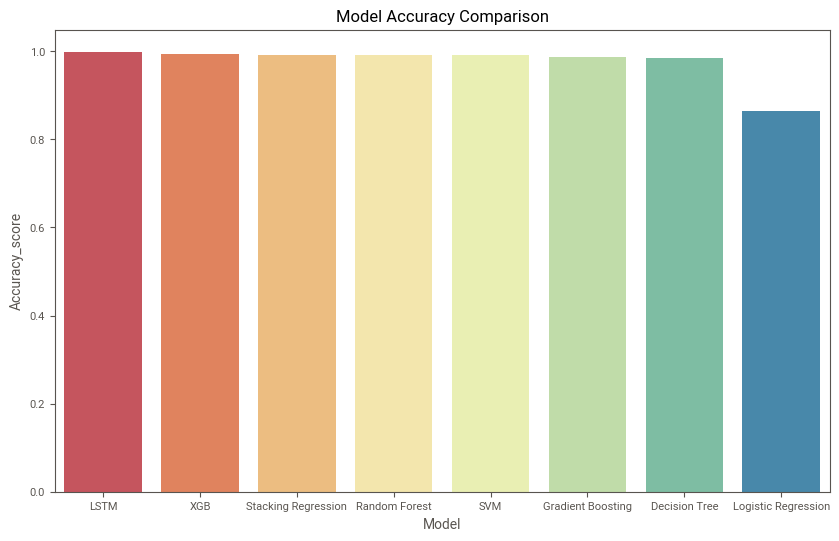

In [152]:
plt.figure(figsize=(10,6))
sns.barplot(x = data_acc['Model'],y= data_acc['Accuracy_score'],palette='Spectral')
plt.xlabel('Model')
plt.ylabel('Accuracy_score')
plt.title('Model Accuracy Comparison')
plt.show()

### Confusion Matrix plot

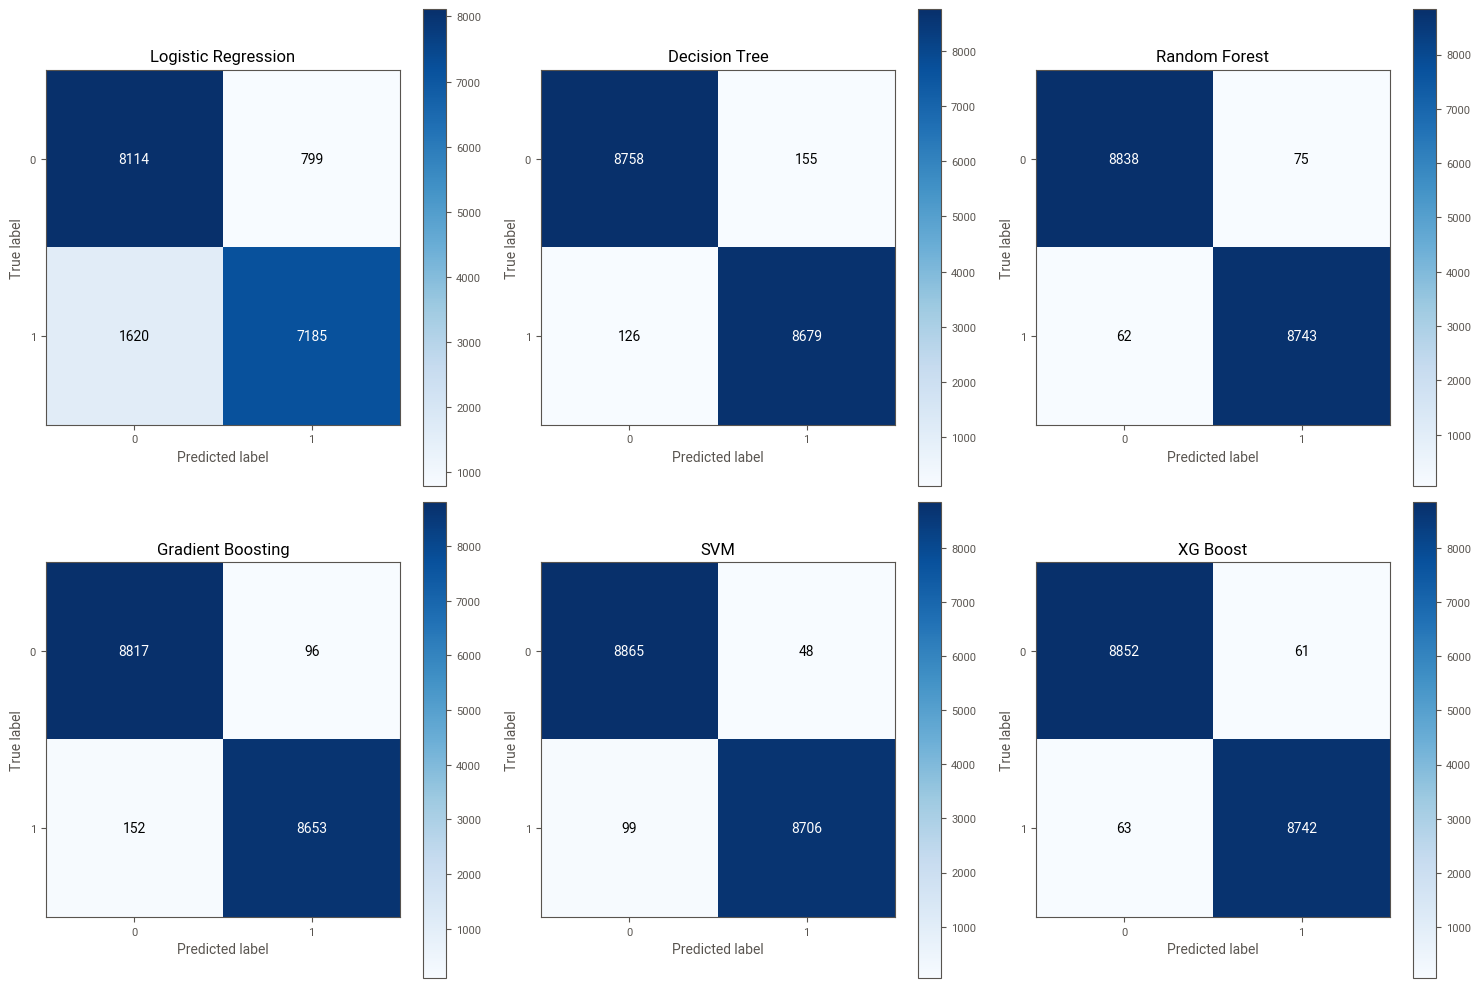

In [153]:
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',C=10,random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=250,random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42))
]

num_models = len(models)
num_rows = (num_models + 2) // 3  
num_cols = min(num_models, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

for i, (model_name, model) in enumerate(models):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
   
    model.fit(x_train, y_train)
    
   
    y_pred = model.predict(x_test)
    
   
    cm = confusion_matrix(y_test, y_pred)
    
    
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=model_name,
           xlabel='Predicted label',
           ylabel='True label')

  
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.tight_layout()
plt.show()

## ROC Curve

In [154]:
# Train SVC
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(x_train, y_train)
svc_y_score = svc_model.predict_proba(x_test)[:, 1]
svc_y_score

array([1.       , 1.       , 1.       , ..., 1.       , 0.9999981,
       1.       ])

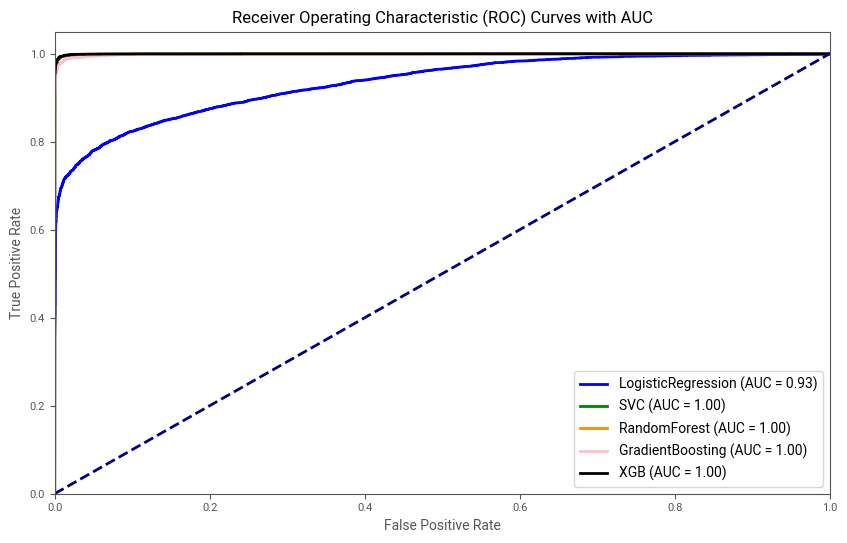

In [157]:
from sklearn.metrics import roc_curve, auc

# Train LogisticRegression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(x_train, y_train)
lr_y_score = lr_model.predict_proba(x_test)[:, 1]

# Train SVC
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(x_train, y_train)
svc_y_score = svc_model.predict_proba(x_test)[:, 1]

## Train random 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_y_score = rf_model.predict_proba(x_test)[:, 1]

## Gradient Bossting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train,y_train)
gb_y_score = gb_model.predict_proba(x_test)[:,1]

## Train XGB
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train,y_train)
xgb_y_score = xgb_model.predict_proba(x_test)[:,1]

# Compute ROC curve and ROC area for each classifier
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_y_score)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_y_score)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_score)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_y_score)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_y_score)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curves
plt.figure(figsize=(10, 6))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'LogisticRegression (AUC = {roc_auc_lr:0.2f})')
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label=f'SVC (AUC = {roc_auc_svc:0.2f})')
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'RandomForest (AUC = {roc_auc_rf:0.2f})')
plt.plot(fpr_gb, tpr_gb, color='pink', lw=2, label=f'GradientBoosting (AUC = {roc_auc_gb:0.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='black', lw=2, label=f'XGB (AUC = {roc_auc_xgb:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves with AUC')
plt.legend(loc="lower right")
plt.show()

## Precision Recall Curve

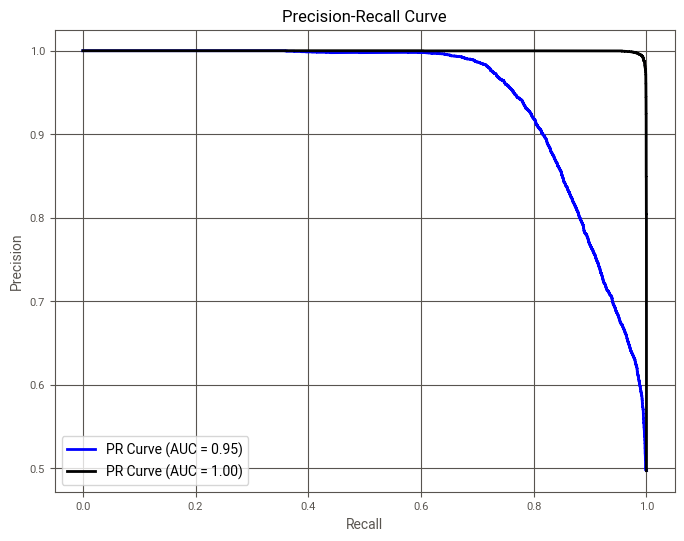

In [161]:
from sklearn.metrics import precision_recall_curve, auc

model = LogisticRegression()
model.fit(x_train, y_train)


model_xg = XGBClassifier()
model_xg.fit(x_train, y_train)
# Get predicted probabilities for the positive class
y_scores = model.predict_proba(x_test)[:, 1]

# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC) for PR curve
auc_score = auc(recall, precision)

y_scores_xg = model_xg.predict_proba(x_test)[:, 1]

# Compute precision and recall values
precision_xg, recall_xg, thresholds_xg = precision_recall_curve(y_test, y_scores_xg)

# Compute area under the curve (AUC) for PR curve
auc_score_xg = auc(recall_xg, precision_xg)


# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {auc_score:.2f})')
plt.plot(recall_xg, precision_xg, color='black', lw=2, label=f'PR Curve (AUC = {auc_score_xg:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

### F1_Score Comparision Plot

In [164]:
import pandas as pd
import plotly.express as px

# Sample data
f1_score = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XG_Boosting'],
    'F1_Score': [0.8559003991183654, 0.9839038766719564, 0.9917139614074916, 0.9916282248419613, 0.9929577464788732]
}
f1 = pd.DataFrame(f1_score)

# Create a bar chart
fig = px.bar(f1, x='Model', y='F1_Score', title='F1 Score Comparison of Multiple Models',
             labels={'Model': 'Model', 'F1_Score': 'F1 Score'},
             color='F1_Score', color_continuous_scale=px.colors.sequential.Viridis,text='F1_Score')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')


# Customize the layout
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='F1 Score',
    coloraxis_showscale=False
)

# Show the plot
fig.show()


# Model Comparison Report

#### Logistic Regression : Logistic Regression had the lowest accuracy score as it is a basic statistical model for binary classification

#### Decision Tree : Decision Tree is prone to overfitting, less accurate than ensemble methods like Random Forest or XGBoost.

#### Gradient Boosting   :  Gradient Boosting performed well but with slightly lower accuracy compared to the top models, highlighting its strength in improving weak learners.

#### Support Vector Machine (SVM) : The SVM model showed high accuracy, underscoring its effectiveness in classification tasks and it is slightly less effective compared to the top models.

#### Stacking Regression : Stacking Regression involves combining multiple regression models to improve prediction accuracy. This model showed competitive performance, just below Random Forest.

#### Random Forest : The Random Forest model demonstrated strong performance, showing its robustness and ability to handle large datasets with high dimensionality.

#### Extreme Gradient Boosting (XGB) : XGB also performed exceptionally well, with an accuracy score just slightly below LSTM.It is highly efficient and scalable

#### Long Short-Term Memory (LSTM) : This model achieved the highest accuracy, indicating it performed best among the evaluated models.LSTM is particularly suitable for sequential and time-series data, which might explain its superior performance.


## 

# Key Challenges

#### The independent features showed minimal correlation, making it difficult to identify strong relationships.
#### Managing the date and time column presents a significant challenge. Proper handling of this data is crucial, as it can                    impact the accuracy and reliability of the analysis
#### Converting a 1D array to a 3D array for implementing an LSTM model is quite challenging. This transformation is essential            because LSTM networks require data in a 3D format (samples, timesteps, features) to effectively capture temporal                        dependencies.
#### Scaling and implementing an LSTM model proved to be challenging due to its unique requirements
#### Enhancing the accuracy from one model to the next posed a significant challenge, as improvements were minimal


##

# Conclusion

#### The strong performance of LSTM model suggests they are well-suited for this task.LSTM models are a type of recurrent neural network (RNN) well-suited for time series prediction and sequential data due to their ability to learn long-term dependencies. This model achieved the highest accuracy, indicating it performed best among the evaluated models.

#### The walk or run classification project confronts a multitude of challenges, ranging from data quality and availability to the nuanced dynamics of activity classification and sensor specifications

#### By overcoming these obstacles, stakeholders have the opportunity to refine their classification models, leading to improved decision-making processes and greater user satisfaction in health and fitness applications.

#### This project offers significant potential for optimizing activity tracking algorithms, enhancing user engagement, and ultimately contributing to healthier lifestyles.